# Loading and Verifying Doc2Vec Models with Gensim

In this notebook, we load two pre-trained Doc2Vec models using Gensim and verify their successful loading by printing their summaries. Follow the steps below:

---

### 1. Importing the Required Class
We import the `Doc2Vec` class from the `gensim.models` package, which provides the functionality to load and work with Doc2Vec models.


In [ ]:
from gensim.models import Doc2Vec

# Replace these with the actual paths to your saved models
model_path1 = "/content/drive/MyDrive/doc2vec_models_2.0/model_1_df1.model"
model_path2 = "/content/drive/MyDrive/doc2vec_models_2.0/model_1_df2.model"

# Load the first model
doc2vec_model1 = Doc2Vec.load(model_path1)

# Load the second model
doc2vec_model2 = Doc2Vec.load(model_path2)

# Verify by printing a summary or looking at some properties
print("Model 1:", doc2vec_model1)
print("Model 2:", doc2vec_model2)

Model 1: Doc2Vec<dm/m,d150,n5,w5,mc2,s0.001,t4>
Model 2: Doc2Vec<dm/m,d150,n5,w5,mc2,s0.001,t4>


# Objective: Identify Potential Innovation Gaps

This cell aims to identify potential innovation gaps by:
- **Loading Doc2Vec Models:** Loading two pre-trained Doc2Vec models.
- **Inferring Sentence Embeddings:** Converting text data (using 'cleaned_tokens') from two datasets (DF1 and DF2) into vector embeddings.
- **Computing Similarity:** Using cosine similarity to measure how close the sentences in DF2 are to those in DF1.
- **Highlighting Gaps:** Selecting and printing the top 5 DF2 sentences that have the lowest average similarity to DF1 sentences, which may indicate areas for innovation.


In [ ]:
from gensim.models import Doc2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

doc2vec_model1 = Doc2Vec.load(model_path1)
doc2vec_model2 = Doc2Vec.load(model_path2)

# Assuming you have val_df1, val_df2, val_sentences_df1, val_sentences_df2 defined
# If not, you need to define them as in your original code before this section

def infer_doc_vectors(model, df):
    return np.array([model.infer_vector(str(text).split()) for text in df['cleaned_tokens']])

embeddings_df1 = infer_doc_vectors(doc2vec_model1, val_df1)
embeddings_df2 = infer_doc_vectors(doc2vec_model2, val_df2)

# Compute pairwise similarities
similarity_matrix = cosine_similarity(embeddings_df1, embeddings_df2)

print("\nSentences from DF2 with lowest similarity to DF1 (possible innovation gaps):\n")
avg_sim_to_df1 = similarity_matrix.mean(axis=0)  # Average similarity of each DF2 sentence to all DF1 sentences
low_sim_indices = avg_sim_to_df1.argsort()[:5]  # Indices of 5 lowest similarities

for idx in low_sim_indices:
    print(f"→ DF2 Sentence: \"{val_sentences_df2[idx][:100]}...\"")
    print(f"Average Similarity to DF1: {avg_sim_to_df1[idx]:.10f}\n")


Sentences from DF2 with lowest similarity to DF1 (possible innovation gaps):

→ DF2 Sentence: "solar solar group cite state solar market sign memorandum understand mou group solar distributor reg..."
Average Similarity to DF1: -0.1555505246

→ DF2 Sentence: "use brow site agre use use high perform system approach chemic process new platform process true che..."
Average Similarity to DF1: -0.1527688354

→ DF2 Sentence: "ammonia hydrogen carrier transport mild although concept frequent practic power system report close ..."
Average Similarity to DF1: -0.1459338367

→ DF2 Sentence: "power critic transit plan build intern renew portfolio make big invest kingdom green power sector we..."
Average Similarity to DF1: -0.1457437128

→ DF2 Sentence: "appeal launch power equip cash thousand solar kit german nonprofit group appeal power equip renew no..."
Average Similarity to DF1: -0.1404614002



# Save Similarities and Innovation Gaps to CSV

This cell calculates the pairwise cosine similarity between DF1 and DF2 embeddings, then:

- **Saves Top Similarities:**
  - Extracts the highest 90 similarity pairs from the similarity matrix.
  - Creates a CSV (`top_similarities.csv`) containing brief extracts of the DF1 and DF2 paragraphs along with their similarity scores.

- **Saves Innovation Gaps:**
  - Computes the average similarity for each DF2 sentence against all DF1 sentences.
  - Identifies the 90 DF2 sentences with the lowest average similarity (indicating potential innovation gaps).
  - Saves these as extracts in a CSV (`innovation_gaps.csv`).

Finally, previews of 5 rows from both CSV files are printed.


In [ ]:
from gensim.models import Doc2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd  # Import pandas for DataFrame creation


# Compute pairwise similarities
similarity_matrix = cosine_similarity(embeddings_df1, embeddings_df2)

# --- Save top 150 most similar sentences ---
# Create a DataFrame for most similar sentences
top_sim_df = pd.DataFrame(columns=['df1_paragraph', 'df2_paragraph', 'similarity'])

# Get indices of top 150 similarities
flat_indices = np.argpartition(similarity_matrix, -90, axis=None)[-90:]  # Changed to -90
row_indices, col_indices = np.unravel_index(flat_indices, similarity_matrix.shape)

# Add sentences and similarities to DataFrame
top_sim_list = []
for i, j in zip(row_indices, col_indices):
    top_sim_list.append({
        'df1_paragraph': val_sentences_df1[i][:90],
        'df2_paragraph': val_sentences_df2[j][:90],
        'similarity': similarity_matrix[i, j]
    })

top_sim_df = pd.concat([top_sim_df, pd.DataFrame(top_sim_list)], ignore_index=True)

# Save to CSV
top_sim_df.to_csv("top_similarities.csv", index=False)


# --- Save top 40 least similar sentences (innovation gaps) ---
# Create a DataFrame for least similar sentences (innovation gaps)
low_sim_df = pd.DataFrame(columns=['paragraphs'])

# Get sentences from DF2 with lowest similarity to DF1
avg_sim_to_df1 = similarity_matrix.mean(axis=0)
low_sim_indices = avg_sim_to_df1.argsort()[:90]

# Add sentences to DataFrame
low_sim_list = []
for idx in low_sim_indices:
    low_sim_list.append({'paragraphs': val_sentences_df2[idx][:100]})

low_sim_df = pd.concat([low_sim_df, pd.DataFrame(low_sim_list)], ignore_index=True)

# Save to CSV
low_sim_df.to_csv("innovation_gaps.csv", index=False)

# --- Preview 5 rows of each CSV ---
print("\nPreview of top_similarities.csv:")
print(pd.read_csv("top_similarities.csv").head(5))  # Read and print 5 rows

print("\nPreview of innovation_gaps.csv:")
print(pd.read_csv("innovation_gaps.csv").head(5))  # Read and print 5 rows


Preview of top_similarities.csv:
                                       df1_paragraph  \
0  glass unit character transmit color character ...   
1  glass unit character transmit color character ...   
2  glass unit character transmit color character ...   
3  glass unit character transmit color character ...   
4  invent technic field arrest arrest monitor mon...   

                                       df2_paragraph  similarity  
0  depart offer three geotherm site part latest r...    0.323891  
1  meter geotherm complex district geotherm heat ...    0.324033  
2  expect launch max seri solar align market stra...    0.324573  
3  scientist put detail project cost design solar...    0.324789  
4  last week vote joe sign bill tuesday bill know...    0.324870  

Preview of innovation_gaps.csv:
                                          paragraphs
0  solar solar group cite state solar market sign...
1  use brow site agre use use high perform system...
2  ammonia hydrogen carrier transpo

<ipython-input-51-474276784791>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_sim_df = pd.concat([top_sim_df, pd.DataFrame(top_sim_list)], ignore_index=True)


# Remove Duplicate Innovation Gaps

This cell reads the CSV file `innovation_gaps.csv`, drops duplicate rows based on the `'paragraphs'` column, and saves the unique entries to a new CSV file (`innovation_gaps_unique.csv`) in the specified directory.


In [ ]:
# --- Drop duplicated rows from innovation_gaps.csv based on 'paragraphs' ---
# Read the CSV file that contains the 'paragraphs' column
low_sim_df = pd.read_csv("innovation_gaps.csv")

# Drop duplicate rows based on the 'paragraphs' column
low_sim_df_unique = low_sim_df.drop_duplicates(subset=['paragraphs'])

# Save the unique paragraphs to a new CSV file
low_sim_df_unique.to_csv("/content/drive/MyDrive/doc2vec_models_2.0/innovation_gaps_unique.csv", index=False)



# **QA**

This notebook generates **Question-Answer (QA) pairs** from a CSV file containing paragraphs of text. For each paragraph, it uses a **pre-trained language model** to first create a relevant question and then generate a detailed answer based on the original paragraph and the question.

---

## **How It Works**

1. **Read CSV File**  
   The code reads up to **250 paragraphs** from the specified CSV file.
2. **Generate Question**  
   For each paragraph, the model is prompted to generate a question related to that paragraph.
3. **Generate Answer**  
   The model is then asked to provide an answer to the generated question, using the same paragraph as context.
4. **Save Results**  
   The resulting QA pairs are stored in a new CSV file called `qa_pairs.csv`.

---

## **About the Model: `google/flan-t5-base`**

The code uses **Google's FLAN-T5** (Fine-tuned Language Net T5) model, specifically the **base version**. FLAN-T5 is an instruction-tuned language model, which has been trained to follow human-like instructions across a wide variety of tasks (e.g., summarization, question generation, translation, etc.). Its ability to generalize from instructions makes it particularly effective for **text-to-text generation** tasks like QA generation, even in zero-shot or few-shot scenarios.

### **Other Variants of FLAN-T5**

Google provides several variants of the Flan-T5 model family, each differing primarily in size (number of parameters). Below are the main “google/flan” checkpoints you’ll commonly find on Hugging Face:

- **google/flan-t5-small**  
- **google/flan-t5-base**  
- **google/flan-t5-large**  
- **google/flan-t5-xl**  
- **google/flan-t5-xxl**  
- **google/flan-ul2**  

Hugging Face `transformers` library, you can easily reference them by their model IDs (for example, `"google/flan-t5-small"`).





# **Notes on the Model and Temperature Setting**

- **Model**: We are using the `google/flan-t5-small` model for text generation. This model is an instruction-tuned version of T5, making it adept at following prompt-style instructions.
- **Temperature = 0.7**: A temperature of 0.7 introduces a moderate level of randomness into the generation process. This helps produce more varied answers while still maintaining coherence. Increasing the temperature generally yields more creative but potentially less focused outputs, whereas lowering it yields more deterministic and predictable responses.


In [ ]:
import os
import pandas as pd
from transformers import pipeline
from IPython.display import display

# Instantiate the text-to-text generation pipeline using an instruction-tuned model.
# We add sampling parameters to encourage more variety in questions/answers.
generator = pipeline(
    "text2text-generation",
    model="google/flan-t5-small",
    # You can tweak these generation parameters to get more or less creative output.
    # e.g., higher temperature -> more randomness, but possibly less coherent.
    # top_p=0.95 -> nucleus sampling
)

# Update the input CSV file path as necessary.
input_csv_file = "/content/drive/MyDrive/doc2vec_models_2.0/innovation_gaps_unique.csv"
df = pd.read_csv(input_csv_file)

# We will generate exactly 10 QA pairs, cycling through rows as needed.
desired_pairs = 10
row_count = len(df)
qa_results = []

pair_index = 0      # Tracks how many pairs we've generated
row_index = 0       # Tracks the current row in the CSV

while pair_index < desired_pairs:
    # If we run out of rows, cycle back to the first row
    if row_index >= row_count:
        row_index = 0

    paragraph = df.loc[row_index, "paragraphs"]
    row_index += 1

    # === Step 1: Generate the Question ===
    question_prompt = (
        "Generate a relevant question based on the following text.\n"
        f"Text: {paragraph}\n"
        "Question:"
    )

    q_output = generator(
        question_prompt,
        max_length=128,
        do_sample=True,
        temperature=0.9,
        top_p=0.95
    )[0]['generated_text']

    # Remove the prompt part from the generated output (if present)
    if q_output.startswith(question_prompt):
        question = q_output[len(question_prompt):].strip()
    else:
        question = q_output.strip()

    # === Step 2: Generate the Answer ===
    answer_prompt = (
        "Based on the text below and the following question, provide a detailed answer that directly addresses the question.\n"
        f"Text: {paragraph}\n"
        f"Question: {question}\n"
        "Answer:"
    )

    a_output = generator(
        answer_prompt,
        max_length=150,
        do_sample=True,
        temperature=0.7,
        top_p=0.95
    )[0]['generated_text']

    if a_output.startswith(answer_prompt):
        answer = a_output[len(answer_prompt):].strip()
    else:
        answer = a_output.strip()

    # Append the results.
    qa_results.append({
        "paragraph": paragraph,
        "question": question,
        "answer": answer
    })

    pair_index += 1
    # Comment out or remove the following line to hide per-pair processing output.
    # print(f"Generated QA pair {pair_index}/{desired_pairs}")

# Create a DataFrame from the QA pairs and save it to a new CSV file.
df_qa = pd.DataFrame(qa_results)
output_csv_file = "qa_pairs_0.7.csv"
df_qa.to_csv(output_csv_file, index=False)

# Show a quick preview of the final CSV output as a nicely formatted DataFrame (first 5 rows).
print("Here is a preview of the generated QA pairs:")
display(df_qa.head(10))

print(f"\nQA pairs saved to {output_csv_file}")


Device set to use cuda:0


Here is a preview of the generated QA pairs:


,paragraph,question,answer
0,solar solar group cite state solar market sign...,What is a form of energy used in energy products?,vapor
1,use brow site agre use use high perform system...,What is the purpose of this study ?,To improve the quality of data.
2,ammonia hydrogen carrier transport mild althou...,What was a report called about ammonia hydroge...,the common practical power system report
3,power critic transit plan build intern renew p...,What is the country of the project that is bei...,Kingdom of the Green Power
4,appeal launch power equip cash thousand solar ...,What will most likely be the name of the compa...,Allied Power
5,recheck platform solar launch partnership sola...,What is the company name of the company that r...,Solar & Solar
6,expand monitor platform offer platform avail e...,Which platform is best suited for this require...,the standard mlp
7,plan plant chine wind giant project support wi...,What was the name of the first major wind deve...,scottish wind council und
8,train program train week equip specialist prog...,Which program taught a teacher the day of the ...,Train program
9,australian pilot australia sodium sulphur clea...,How many flights has this cargo flier given to...,11



QA pairs saved to qa_pairs_0.7.csv


# **Notes on the Model and Temperature Setting**

- **Model**: We are using the `google/flan-t5-base` model for text generation. This model is an instruction-tuned variant of T5, enabling it to respond well to prompt-based instructions.
- **Temperature = 0.7**: A temperature of 0.7 offers a balance between creativity and coherence. Higher temperature (closer to 1) generally increases the randomness and diversity of outputs, while lower temperature (closer to 0) produces more deterministic and focused results.


In [ ]:
import os
import pandas as pd
from transformers import pipeline
from IPython.display import display

# Instantiate the text-to-text generation pipeline using an instruction-tuned model.
# We add sampling parameters to encourage more variety in questions/answers.
generator = pipeline(
    "text2text-generation",
    model="google/flan-t5-base",
    # You can tweak these generation parameters to get more or less creative output.
    # e.g., higher temperature -> more randomness, but possibly less coherent.
    # top_p=0.95 -> nucleus sampling
)

# Update the input CSV file path as necessary.
input_csv_file = "/content/drive/MyDrive/doc2vec_models_2.0/innovation_gaps_unique.csv"
df = pd.read_csv(input_csv_file)

# We will generate exactly 250 QA pairs, cycling through rows as needed.
desired_pairs = 10
row_count = len(df)
qa_results = []

pair_index = 0      # Tracks how many pairs we've generated
row_index = 0       # Tracks the current row in the CSV

while pair_index < desired_pairs:
    # If we run out of rows, cycle back to the first row
    if row_index >= row_count:
        row_index = 0

    paragraph = df.loc[row_index, "paragraphs"]
    row_index += 1

    # === Step 1: Generate the Question ===
    question_prompt = (
        "Generate a relevant question based on the following text.\n"
        f"Text: {paragraph}\n"
        "Question:"
    )

    # Use sampling params for variety.
    q_output = generator(
        question_prompt,
        max_length=128,
        do_sample=True,
        temperature=0.9,
        top_p=0.95
    )[0]['generated_text']

    # Remove the prompt part from the generated output (if present)
    if q_output.startswith(question_prompt):
        question = q_output[len(question_prompt):].strip()
    else:
        question = q_output.strip()

    # === Step 2: Generate the Answer ===
    answer_prompt = (
        "Based on the text below and the following question, provide a detailed answer that directly addresses the question.\n"
        f"Text: {paragraph}\n"
        f"Question: {question}\n"
        "Answer:"
    )

    a_output = generator(
        answer_prompt,
        max_length=150,
        do_sample=True,
        temperature=0.7,
        top_p=0.95
    )[0]['generated_text']

    if a_output.startswith(answer_prompt):
        answer = a_output[len(answer_prompt):].strip()
    else:
        answer = a_output.strip()

    # Append the results.
    qa_results.append({
        "paragraph": paragraph,
        "question": question,
        "answer": answer
    })

    pair_index += 1
    print(f"Generated QA pair {pair_index}/{desired_pairs}")

# Create a DataFrame from the QA pairs and save it to a new CSV file.
df_qa = pd.DataFrame(qa_results)
output_csv_file = "qa_pairs_0.7.csv"
df_qa.to_csv(output_csv_file, index=False)
print(f"QA pairs saved to {output_csv_file}")

# Show a quick preview of the final CSV output as a nicely formatted DataFrame (first 5 rows).
print("Here is a preview of the generated QA pairs:")
display(df_qa.head(10))


Device set to use cuda:0


Generated QA pair 1/10
Generated QA pair 2/10
Generated QA pair 3/10
Generated QA pair 4/10
Generated QA pair 5/10
Generated QA pair 6/10
Generated QA pair 7/10
Generated QA pair 8/10
Generated QA pair 9/10
Generated QA pair 10/10
QA pairs saved to qa_pairs_0.7.csv
Here is a preview of the generated QA pairs:


,paragraph,question,answer
0,solar solar group cite state solar market sign...,What was the main concern regarding the memora...,state solar market sign memorandum understand ...
1,use brow site agre use use high perform system...,What are the benefits of using a high performi...,A high performance system can increase efficie...
2,ammonia hydrogen carrier transport mild althou...,What is the purpose of this report?,to evaluate the feasibility of the proposed tr...
3,power critic transit plan build intern renew p...,why do they need money?,They want to make sure their economy can produ...
4,appeal launch power equip cash thousand solar ...,What is the cause of the appeal?,renewable energy
5,recheck platform solar launch partnership sola...,Why is the company looking for a partner to he...,The company wants to build a solar energy plat...
6,expand monitor platform offer platform avail e...,What do they need to do before this?,They need to apply for a license.
7,plan plant chine wind giant project support wi...,What are some of the problems with the plan?,The plan's main problem was its environmental ...
8,train program train week equip specialist prog...,What is the best program to train your childre...,the best program to train your children accord...
9,australian pilot australia sodium sulphur clea...,What is the purpose of the project?,Clean up the air


# **Notes on the Model and Temperature Setting**

- **Model**: We are using the `google/flan-t5-large` model for text generation. This is an instruction-tuned T5 variant that excels at following prompt-style instructions across a variety of tasks.
- **Temperature = 0.7**: A temperature of 0.7 strikes a balance between creativity and coherence. A higher temperature typically generates more diverse (but sometimes less focused) outputs, while a lower temperature generates more deterministic and focused results.


In [ ]:
import os
import pandas as pd
from transformers import pipeline
from IPython.display import display

# Instantiate the text-to-text generation pipeline using an instruction-tuned model.
# We add sampling parameters to encourage more variety in questions/answers.
generator = pipeline(
    "text2text-generation",
    model="google/flan-t5-large",
    # You can tweak these generation parameters to get more or less creative output.
    # e.g., higher temperature -> more randomness, but possibly less coherent.
    # top_p=0.95 -> nucleus sampling
)

# Update the input CSV file path as necessary.
input_csv_file = "/content/drive/MyDrive/doc2vec_models_2.0/innovation_gaps_unique.csv"
df = pd.read_csv(input_csv_file)

# We will generate exactly 250 QA pairs, cycling through rows as needed.
desired_pairs = 10
row_count = len(df)
qa_results = []

pair_index = 0      # Tracks how many pairs we've generated
row_index = 0       # Tracks the current row in the CSV

while pair_index < desired_pairs:
    # If we run out of rows, cycle back to the first row
    if row_index >= row_count:
        row_index = 0

    paragraph = df.loc[row_index, "paragraphs"]
    row_index += 1

    # === Step 1: Generate the Question ===
    question_prompt = (
        "Generate a relevant question based on the following text.\n"
        f"Text: {paragraph}\n"
        "Question:"
    )

    # Use sampling params for variety.
    q_output = generator(
        question_prompt,
        max_length=128,
        do_sample=True,
        temperature=0.9,
        top_p=0.95
    )[0]['generated_text']

    # Remove the prompt part from the generated output (if present)
    if q_output.startswith(question_prompt):
        question = q_output[len(question_prompt):].strip()
    else:
        question = q_output.strip()

    # === Step 2: Generate the Answer ===
    answer_prompt = (
        "Based on the text below and the following question, provide a detailed answer that directly addresses the question.\n"
        f"Text: {paragraph}\n"
        f"Question: {question}\n"
        "Answer:"
    )

    a_output = generator(
        answer_prompt,
        max_length=150,
        do_sample=True,
        temperature=0.7,
        top_p=0.95
    )[0]['generated_text']

    if a_output.startswith(answer_prompt):
        answer = a_output[len(answer_prompt):].strip()
    else:
        answer = a_output.strip()

    # Append the results.
    qa_results.append({
        "paragraph": paragraph,
        "question": question,
        "answer": answer
    })

    pair_index += 1
    print(f"Generated QA pair {pair_index}/{desired_pairs}")

# Create a DataFrame from the QA pairs and save it to a new CSV file.
df_qa = pd.DataFrame(qa_results)
output_csv_file = "qa_pairs_0.7.csv"
df_qa.to_csv(output_csv_file, index=False)
print(f"QA pairs saved to {output_csv_file}")

# Show a quick preview of the final CSV output as a nicely formatted DataFrame (first 5 rows).
print("Here is a preview of the generated QA pairs:")
display(df_qa.head(10))


Device set to use cuda:0


Generated QA pair 1/10
Generated QA pair 2/10
Generated QA pair 3/10
Generated QA pair 4/10
Generated QA pair 5/10
Generated QA pair 6/10
Generated QA pair 7/10
Generated QA pair 8/10
Generated QA pair 9/10
Generated QA pair 10/10
QA pairs saved to qa_pairs_0.7.csv
Here is a preview of the generated QA pairs:


,paragraph,question,answer
0,solar solar group cite state solar market sign...,What will happen to the solar group?,sign a memorandum
1,use brow site agre use use high perform system...,What might be the reason for the use of site a...,high perform system approach
2,ammonia hydrogen carrier transport mild althou...,How would you describe the author?,A scientist
3,power critic transit plan build intern renew p...,What does the power sector look to invest in?,green
4,appeal launch power equip cash thousand solar ...,What is the reason for them wanting to raise m...,solar kit
5,recheck platform solar launch partnership sola...,What may be the reason for recheck's solar con...,It is the first solar platform of its kind.
6,expand monitor platform offer platform avail e...,What will happen if the platform is not accepted?,user will get lost
7,plan plant chine wind giant project support wi...,What will happen to the plant?,will help support wind growth
8,train program train week equip specialist prog...,What are the possible reasons the programme wa...,to train a new crew
9,australian pilot australia sodium sulphur clea...,What is the purpose of the post?,research


# **Notes on the Model and Temperature Setting**

- **Model**: We are using the `google/flan-T5-XL` model for text generation. This is a larger, instruction-tuned T5 variant that can produce more detailed and context-aware outputs based on your prompts.
- **Temperature = 0.7**: A temperature of 0.7 balances variety and consistency. A higher temperature can yield more diverse (but potentially less precise) responses, while a lower temperature yields more deterministic answers.


In [ ]:
import os
import pandas as pd
from transformers import pipeline
from IPython.display import display

# Instantiate the text-to-text generation pipeline using an instruction-tuned model.
# We add sampling parameters to encourage more variety in questions/answers.
generator = pipeline(
    "text2text-generation",
    model="google/flan-T5-XL",
    # You can tweak these generation parameters to get more or less creative output.
    # e.g., higher temperature -> more randomness, but possibly less coherent.
    # top_p=0.95 -> nucleus sampling
)

# Update the input CSV file path as necessary.
input_csv_file = "/content/drive/MyDrive/doc2vec_models_2.0/innovation_gaps_unique.csv"
df = pd.read_csv(input_csv_file)

# We will generate exactly 250 QA pairs, cycling through rows as needed.
desired_pairs = 10
row_count = len(df)
qa_results = []

pair_index = 0      # Tracks how many pairs we've generated
row_index = 0       # Tracks the current row in the CSV

while pair_index < desired_pairs:
    # If we run out of rows, cycle back to the first row
    if row_index >= row_count:
        row_index = 0

    paragraph = df.loc[row_index, "paragraphs"]
    row_index += 1

    # === Step 1: Generate the Question ===
    question_prompt = (
        "Generate a relevant question based on the following text.\n"
        f"Text: {paragraph}\n"
        "Question:"
    )

    # Use sampling params for variety.
    q_output = generator(
        question_prompt,
        max_length=128,
        do_sample=True,
        temperature=0.7,
        top_p=0.95
    )[0]['generated_text']

    # Remove the prompt part from the generated output (if present)
    if q_output.startswith(question_prompt):
        question = q_output[len(question_prompt):].strip()
    else:
        question = q_output.strip()

    # === Step 2: Generate the Answer ===
    answer_prompt = (
        "Based on the text below and the following question, provide a detailed answer that directly addresses the question.\n"
        f"Text: {paragraph}\n"
        f"Question: {question}\n"
        "Answer:"
    )

    a_output = generator(
        answer_prompt,
        max_length=150,
        do_sample=True,
        temperature=0.7,
        top_p=0.95
    )[0]['generated_text']

    if a_output.startswith(answer_prompt):
        answer = a_output[len(answer_prompt):].strip()
    else:
        answer = a_output.strip()

    # Append the results.
    qa_results.append({
        "paragraph": paragraph,
        "question": question,
        "answer": answer
    })

    pair_index += 1
    print(f"Generated QA pair {pair_index}/{desired_pairs}")

# Create a DataFrame from the QA pairs and save it to a new CSV file.
df_qa = pd.DataFrame(qa_results)
output_csv_file = "/content/drive/MyDrive/QA/qa_pairs_flan_T5_XL_0.7.csv"
df_qa.to_csv(output_csv_file, index=False)
print(f"QA pairs saved to {output_csv_file}")

# Show a quick preview of the final CSV output as a nicely formatted DataFrame (first 5 rows).
print("\nHere is a preview of the generated QA pairs:")
display(df_qa.head(10))


config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.45G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0


Generated QA pair 1/10
Generated QA pair 2/10
Generated QA pair 3/10
Generated QA pair 4/10
Generated QA pair 5/10
Generated QA pair 6/10
Generated QA pair 7/10
Generated QA pair 8/10
Generated QA pair 9/10
Generated QA pair 10/10
QA pairs saved to /content/drive/MyDrive/QA/qa_pairs_flan_T5_XL_0.7.csv

Here is a preview of the generated QA pairs:


,paragraph,question,answer
0,solar solar group cite state solar market sign...,What does the speaker likely believe about sol...,They believe it is renewable and can be benefi...
1,use brow site agre use use high perform system...,What is the purpose of this post?,To give detailed information on a specific topic.
2,ammonia hydrogen carrier transport mild althou...,What can be said about the author?,He is a man who is a professor of electrical e...
3,power critic transit plan build intern renew p...,What is the purpose of the plan?,to build intern renew portfolio make big inves...
4,appeal launch power equip cash thousand solar ...,What does the nonprofit group need to do befor...,renew
5,recheck platform solar launch partnership sola...,What will happen to the contractor?,They will be rechecked.
6,expand monitor platform offer platform avail e...,What may be the reason for expanding the monit...,to offer more options to the user
7,plan plant chine wind giant project support wi...,What is the title of the text?,wind
8,train program train week equip specialist prog...,What is the purpose of the article?,To provide an overview of the training curricu...
9,australian pilot australia sodium sulphur clea...,What is the first word of the second sentence?,pilot


# **Notes on the Model and Temperature Setting**

- **Model**: We are using the `google/flan-T5-XL` model for text generation. This is a highly capable, instruction-tuned T5 variant that can produce detailed and context-aware outputs based on your prompts.
- **Temperature = 1**: A temperature of 1 increases randomness in the model’s output, often resulting in more creative or diverse responses. Note that higher temperatures can sometimes reduce coherence, so you may need to experiment with different values to achieve the desired level of variety versus consistency.


In [ ]:
import os
import pandas as pd
from transformers import pipeline
from IPython.display import display

# Instantiate the text-to-text generation pipeline using an instruction-tuned model.
# We add sampling parameters to encourage more variety in questions/answers.
generator = pipeline(
    "text2text-generation",
    model="google/flan-T5-XL",
    do_sample=True,
    temperature=1,
    top_p=0.95,
    max_length=150
)

# Update the input CSV file path as necessary.
input_csv_file = "/content/drive/MyDrive/doc2vec_models_2.0/innovation_gaps_unique.csv"
df = pd.read_csv(input_csv_file)

# We will generate exactly 10 QA pairs, cycling through rows as needed.
desired_pairs = 10
row_count = len(df)
qa_results = []

pair_index = 0      # Tracks how many pairs we've generated
row_index = 0       # Tracks the current row in the CSV

while pair_index < desired_pairs:
    # If we run out of rows, cycle back to the first row
    if row_index >= row_count:
        row_index = 0

    paragraph = df.loc[row_index, "paragraphs"]
    row_index += 1

    # === Step 1: Generate the Question ===
    question_prompt = (
        "Generate a relevant question based on the following text.\n"
        f"Text: {paragraph}\n"
        "Question:"
    )

    # Use sampling params for variety.
    q_output = generator(
        question_prompt,
        max_length=128,
        do_sample=True,
        temperature=1,
        top_p=0.95
    )[0]['generated_text']

    # Remove the prompt part from the generated output (if present)
    if q_output.startswith(question_prompt):
        question = q_output[len(question_prompt):].strip()
    else:
        question = q_output.strip()

    # === Step 2: Generate the Answer ===
    answer_prompt = (
        "Based on the text below and the following question, provide a detailed answer that directly addresses the question.\n"
        f"Text: {paragraph}\n"
        f"Question: {question}\n"
        "Answer:"
    )

    a_output = generator(
        answer_prompt,
        max_length=150,
        do_sample=True,
        temperature=0.7,
        top_p=0.95
    )[0]['generated_text']

    if a_output.startswith(answer_prompt):
        answer = a_output[len(answer_prompt):].strip()
    else:
        answer = a_output.strip()

    # Append the results.
    qa_results.append({
        "paragraph": paragraph,
        "question": question,
        "answer": answer
    })

    pair_index += 1
    print(f"Generated QA pair {pair_index}/{desired_pairs}")

# Create a DataFrame from the QA pairs and save it to a new CSV file.
df_qa = pd.DataFrame(qa_results)
output_csv_file = "/content/drive/MyDrive/QA/qa_pairs_flan_T5_XL_1.csv"
df_qa.to_csv(output_csv_file, index=False)
print(f"\nQA pairs saved to {output_csv_file}")

# Show a quick preview of the final CSV output as a nicely formatted DataFrame (first 5 rows).
print("\nHere is a preview of the generated QA pairs:")
display(df_qa.head(10))


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


Generated QA pair 1/10
Generated QA pair 2/10
Generated QA pair 3/10
Generated QA pair 4/10
Generated QA pair 5/10
Generated QA pair 6/10
Generated QA pair 7/10
Generated QA pair 8/10
Generated QA pair 9/10
Generated QA pair 10/10

QA pairs saved to /content/drive/MyDrive/QA/qa_pairs_flan_T5_XL_1.csv

Here is a preview of the generated QA pairs:


,paragraph,question,answer
0,solar solar group cite state solar market sign...,What is the main idea of the text?,solar energy
1,use brow site agre use use high perform system...,What was the best title of the passage?,chemic process
2,ammonia hydrogen carrier transport mild althou...,What state of a system might be this report ab...,mild
3,power critic transit plan build intern renew p...,What will happen to these two words to fit thi...,invest will change into renew
4,appeal launch power equip cash thousand solar ...,What is a plausible fact about the speaker?,They are a member of a nonprofit group.
5,recheck platform solar launch partnership sola...,Why is the author discussing the partnership w...,The author wants to discuss the partnership wi...
6,expand monitor platform offer platform avail e...,"Why did the speaker use the phrase ""in transit...",Because they were trying to describe the movem...
7,plan plant chine wind giant project support wi...,What's the plausible order in which these even...,Support wind growth wind one plan name scottis...
8,train program train week equip specialist prog...,What are some things I need to do for my job? ...,[ii]
9,australian pilot australia sodium sulphur clea...,What is Australia's role in the clean hub proj...,pilot


### About the Dolly V2 Model

Databricks’ Dolly V2 is a family of open-source large language models derived from EleutherAI’s Pythia models. These models are instruction-tuned on a dataset of human-written question-and-answer pairs, enabling them to provide more helpful and context-aware responses. Dolly V2 is released under a permissive license, making it suitable for both commercial use and further fine-tuning.

### About the `temperature` Parameter

The `temperature` parameter (set to `0.7` in this script) influences the randomness of the generated text.
- A **lower** temperature (e.g., 0.1) makes the output more deterministic and focused.
- A **higher** temperature (e.g., 1.0 or above) increases the variability and creativity in the generated text but can also lead to less coherent or off-topic responses.


In [ ]:
import os
import pandas as pd
from transformers import pipeline
from IPython.display import display

# 1) Dolly V2 pipeline
generator = pipeline(
    "text-generation",
    model="databricks/dolly-v2-7b",
    do_sample=True,
    temperature=0.7,
    top_p=0.95,
    max_new_tokens=128,
    trust_remote_code=True  # Add this line
)

# 2) Load CSV
input_csv_file = "/content/drive/MyDrive/doc2vec_models_2.0/innovation_gaps_unique.csv"
df = pd.read_csv(input_csv_file)

desired_pairs = 10
row_count = len(df)
qa_results = []

pair_index = 0
row_index = 0

# 3) Generate Q&A
while pair_index < desired_pairs:
    if row_index >= row_count:
        row_index = 0

    paragraph = df.loc[row_index, "paragraphs"]
    row_index += 1

    question_prompt = (
        f"Generate a relevant question based on the following text:\n{paragraph}\nQuestion: "
    )
    q_output = generator(question_prompt, max_new_tokens=64)
    question = q_output[0]['generated_text'].replace(question_prompt, "").strip()

    answer_prompt = (
        f"Based on the text below and the following question, provide a detailed answer:\n"
        f"Text: {paragraph}\nQuestion: {question}\nAnswer: "
    )
    a_output = generator(answer_prompt, max_new_tokens=100)
    answer = a_output[0]['generated_text'].replace(answer_prompt, "").strip()

    qa_results.append({
        "paragraph": paragraph,
        "question": question,
        "answer": answer
    })

    pair_index += 1
    print(f"Generated QA pair {pair_index}/{desired_pairs}")

# 4) Save to CSV
df_qa = pd.DataFrame(qa_results)
output_csv_file = "/content/drive/MyDrive/QA/qa_pairs_dolly_v2_7b.csv"
df_qa.to_csv(output_csv_file, index=False)
print(f"\nQA pairs saved to {output_csv_file}")

# 5) Display a preview of the generated DataFrame (first 5 rows)
print("\nHere is a preview of the generated QA pairs:")
display(df_qa.head(10))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

instruct_pipeline.py:   0%|          | 0.00/9.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/databricks/dolly-v2-7b:
- instruct_pipeline.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/13.8G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/13.8G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Device set to use cuda:0


Generated QA pair 1/10
Generated QA pair 2/10
Generated QA pair 3/10
Generated QA pair 4/10


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Generated QA pair 5/10
Generated QA pair 6/10
Generated QA pair 7/10
Generated QA pair 8/10
Generated QA pair 9/10
Generated QA pair 10/10

QA pairs saved to /content/drive/MyDrive/QA/qa_pairs_dolly_v2_7b.csv

Here is a preview of the generated QA pairs:


,paragraph,question,answer
0,solar solar group cite state solar market sign...,Who is Mou? And why is it important in this co...,Mou is a solar distributor in the state of Cal...
1,use brow site agre use use high perform system...,high perform system approach chemic process ne...,Text: use brow site agre use use high perform ...
2,ammonia hydrogen carrier transport mild althou...,The text provides information about ammonia hy...,"Based on the provided text and the question, t..."
3,power critic transit plan build intern renew p...,"The text provides a relevant question ""power c...","The text provides a relevant question ""power c..."
4,appeal launch power equip cash thousand solar ...,"The German non-profit group, Appeal, is launch...",1000€\n\nThe text above refers to a solar powe...
5,recheck platform solar launch partnership sola...,recheck platform solar launch partnership sola...,"The text below is from a partner of SolarCity,..."
6,expand monitor platform offer platform avail e...,user transit develop stage mo is an offer by t...,"Based on the text above, the monitor platform ..."
7,plan plant chine wind giant project support wi...,Scottish Wind Council plans to build the large...,The Scottish Wind Council plans to build the l...
8,train program train week equip specialist prog...,train program train week equip specialist prog...,train program train week equip specialist prog...
9,australian pilot australia sodium sulphur clea...,southwest pilot australia sodium sulphur clean...,southwest pilot australia sodium sulphur clean...


**Model**:  
- **tiiuae/falcon-7b-instruct** is an instruction-tuned version of Falcon-7B, released under the permissive Apache 2.0 license by the Technology Innovation Institute (TII). It is designed to handle various instruction-based prompts, generating more coherent, context-aware responses than non-instruction-tuned models.

**Key Parameter (Temperature = 1.0)**:  
- **`temperature=1.0`** controls the randomness of word selection during text generation. A temperature of 1.0 provides a balanced mix of creativity and coherence. Higher values (>1) increase diversity (potentially at the cost of logic), while lower values (<1) lead to more deterministic, focused outputs.


In [ ]:
import os
import pandas as pd
from transformers import pipeline
from IPython.display import display

# 1) Initialize the pipeline
generator = pipeline(
    "text-generation",
    model="tiiuae/falcon-7b-instruct",
    do_sample=True,
    temperature=1.0,
    top_p=0.95,
    max_new_tokens=128
)

# 2) Load your CSV
input_csv_file = "/content/drive/MyDrive/doc2vec_models_2.0/innovation_gaps_unique.csv"
df = pd.read_csv(input_csv_file)

desired_pairs = 10
row_count = len(df)
qa_results = []

pair_index = 0
row_index = 0

# 3) Loop to generate Q&A
while pair_index < desired_pairs:
    if row_index >= row_count:
        row_index = 0

    paragraph = df.loc[row_index, "paragraphs"]
    row_index += 1

    # Generate question
    question_prompt = (
        f"Generate a relevant question about the following text:\n{paragraph}\nQuestion: "
    )
    q_output = generator(question_prompt, max_new_tokens=64)
    question = q_output[0]['generated_text'].replace(question_prompt, "").strip()

    # Generate answer
    answer_prompt = (
        f"Based on the text below and the following question, provide a detailed answer:\n"
        f"Text: {paragraph}\nQuestion: {question}\nAnswer: "
    )
    a_output = generator(answer_prompt, max_new_tokens=100)
    answer = a_output[0]['generated_text'].replace(answer_prompt, "").strip()

    qa_results.append({
        "paragraph": paragraph,
        "question": question,
        "answer": answer
    })

    pair_index += 1
    print(f"Generated QA pair {pair_index}/{desired_pairs}")

# 4) Save results
df_qa = pd.DataFrame(qa_results)
output_csv_file = "qa_pairs_falcon7b_instruct.csv"
df_qa.to_csv(output_csv_file, index=False)
print(f"\nQA pairs saved to {output_csv_file}")

# 5) Display a preview of the generated DataFrame (first 5 rows)
print("\nHere is a preview of the generated QA pairs:")
display(df_qa.head(10))


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Generated QA pair 1/10


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Generated QA pair 2/10


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Generated QA pair 3/10


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Generated QA pair 4/10


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Generated QA pair 5/10


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Generated QA pair 6/10


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Generated QA pair 7/10


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Generated QA pair 8/10


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Generated QA pair 9/10


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Generated QA pair 10/10

QA pairs saved to qa_pairs_falcon7b_instruct.csv

Here is a preview of the generated QA pairs:


,paragraph,question,answer
0,solar solar group cite state solar market sign...,"""What does the text mean when it says'solar so...",The text is referring to a specific solar ener...
1,use brow site agre use use high perform system...,"""How do the specific elements in the text cont...",1. 'use' serves as a verb and is used in the c...
2,ammonia hydrogen carrier transport mild althou...,'What is the significance of ammonia as a hydr...,Ammonia is significant as a hydrogen carrier d...
3,power critic transit plan build intern renew p...,"""What is the power sector doing to invest in g...",The power sector is actively investing in rene...
4,appeal launch power equip cash thousand solar ...,'What do the German nonprofit group and solar ...,"The German nonprofit group, appeal power equip..."
5,recheck platform solar launch partnership sola...,'What kind of solar contractor partner is bein...,The text refers to a solar contractor partner ...
6,expand monitor platform offer platform avail e...,"""What is the meaning of the word'mo' in the gi...","In the given text, the word ""mo"" can mean ""mor..."
7,plan plant chine wind giant project support wi...,What is the name of the project in the text?,'The Great Western Wind Project' is the name o...
8,train program train week equip specialist prog...,What is the best way to prepare for a train pr...,"1. Firstly, choose the right train program for..."
9,australian pilot australia sodium sulphur clea...,'How does the southwest pilot project in Austr...,The southwest pilot project in Australia is a ...


## Performance Comparison: google/flan-T5-XL and tiiuae/falcon-7b-instruct

Upon manually reviewing the generated question-and-answer pairs, **google/flan-T5-XL** and **tiiuae/falcon-7b-instruct** stood out as top performers, consistently offering responses that were both contextually relevant and factually accurate. Their outputs demonstrated a clear understanding of the prompts, addressing the intended topic without veering into irrelevant details.

### Key Observations

1. **Relevance and Accuracy**  
   Both models provided answers that closely matched the context of the prompt and were generally free of factual errors. Their strong comprehension skills ensured the answers were coherent and logically structured.

2. **Stylistic Differences**  
   - **Flan-T5-XL**  
     - Produced shorter, more concise responses.  
     - Tended to address the question directly without extensive elaboration.  
   - **Falcon-7b**  
     - Offered answers that were still accurate yet more expansive.  
     - Sometimes included additional or tangential details from its retained model knowledge.

### Overall Quality

A careful manual analysis confirmed that both **Flan-T5-XL** and **Falcon-7b** exhibited fewer errors and higher clarity when compared to other models tested. Their responsiveness, focus, and structured delivery made them stand out as superior performers in generating high-quality question-and-answer pairs.


In [ ]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-linux_x86_64.whl.metadata (27 kB)
Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-linux_x86_64.whl (848.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 3.2 MB/s eta 0:00:00


### Categories

This script demonstrates how to classify questions into five categories (Factual, Analytical, Comparative, Procedural, or Other) using the **Falcon-7B-Instruct** model from Hugging Face. The steps include:

1. **Loading the Model**: The script downloads the tokenizer and model weights for Falcon-7B-Instruct.
2. **Creating a Pipeline**: A text-generation pipeline is set up to generate responses to a provided prompt.
3. **Reading the CSV**: It reads in a CSV file that contains a list of question strings.
4. **Categorizing Each Question**: For each question, the code constructs a prompt requesting a single category and uses the model’s response to determine the best-fitting category.
5. **Output**: Finally, the script saves the updated CSV (with a new “Category” column) to a specified output file.

By running this script, you can automatically organize a large set of questions based on their content or complexity.


In [ ]:
import sys

try:
    import torch
    from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
    import pandas as pd
    from tqdm import tqdm
except ImportError:
    print("Installing missing packages...")
    sys.exit("Please install 'transformers', 'accelerate', 'pandas', and 'tqdm' before running this script.")

# 1. Load the Falcon 7B Instruct model and tokenizer from Hugging Face
model_name = "tiiuae/falcon-7b-instruct"

print("Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

print("Loading model...")
# If you have a GPU, you can set device_map='auto' or 'cuda:0'
# If CPU only, set device_map=None (may be slow or OOM on large models)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    trust_remote_code=True,
    device_map="auto"
)

print("Creating pipeline...")
generator = pipeline(
    task="text-generation",
    model=model,
    tokenizer=tokenizer,
    # device=0  # if you want to specify GPU index
)

def categorize_with_falcon(question: str) -> str:
    """
    Given a question string, generate a response from Falcon-7B-Instruct
    to categorize it into one of the 5 categories.
    """
    prompt = f"""
I have the following categories:
1) Factual
2) Analytical
3) Comparative
4) Procedural
5) Other

Categorize the following question into the most fitting single category.
Only output the category name itself, e.g. "Factual".

Question: "{question}"
Answer:
"""
    # Generate a response from Falcon
    response = generator(
        prompt,
        max_new_tokens=50,  # Adjust as needed
        temperature=0.0,    # 0.0 => more deterministic
        do_sample=False
    )

    # response is a list of dicts; we only need response[0]["generated_text"]
    output_text = response[0]["generated_text"]

    # Attempt to parse out the category from the generated text
    if "Answer:" in output_text:
        category_part = output_text.split("Answer:")[-1].strip()
    else:
        category_part = output_text.strip()

    # Take the first line in case the model returns extra text
    category_line = category_part.split("\n")[0].strip()

    # Optional cleanup: remove trailing punctuation
    # category_line = category_line.rstrip(".,:!?")

    # Ensure the returned category is one of our known labels
    known_categories = ["Factual", "Analytical", "Comparative", "Procedural", "Other"]
    for cat in known_categories:
        if cat.lower() in category_line.lower():
            return cat

    return "Other"

def main():
    # 2. Read your CSV
    input_csv = "/content/drive/MyDrive/QA/qa_pairs_falcon7b_instruct.csv"  # change to your actual path
    output_csv = "/content/drive/MyDrive/QA/categorized_output.csv"

    print(f"Reading from {input_csv}...")
    df = pd.read_csv(input_csv)

    # Ensure the column name matches what's in your CSV
    question_col = "question"
    if question_col not in df.columns:
        raise ValueError(f"Column '{question_col}' not found in CSV.")

    # 3. Apply categorization with a progress bar
    print("Classifying questions...")

    # Initialize tqdm to track progress over rows
    tqdm.pandas(desc="Categorizing")

    # Use 'progress_apply' instead of 'apply'
    df["Category"] = df[question_col].progress_apply(categorize_with_falcon)

    # 4. Save results
    print(f"Saving results to {output_csv}...")
    df.to_csv(output_csv, index=False)

    print("Done.")

if __name__ == "__main__":
    main()


Loading tokenizer...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

Loading model...


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

configuration_falcon.py:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



modeling_falcon.py:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

Device set to use cuda:0


Creating pipeline...
Reading from /content/drive/MyDrive/QA/qa_pairs_falcon7b_instruct.csv...
Classifying questions...


Categorizing:   0%|          | 0/250 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Categorizing:   4%|▍         | 11/250 [00:08<03:52,  1.03it/s]You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Categorizing: 100%|██████████| 250/250 [02:55<00:00,  1.42it/s]

Saving results to /content/drive/MyDrive/QA/categorized_output.csv...
Done.


#### Code Overview

- Loads a CSV file and checks for a `"question"` column.
- Counts the frequencies of each category from the `"Category"` column.
- Plots a bar chart with distinct colors and labels using Matplotlib.
- Displays the chart to visualize the distribution of categories.


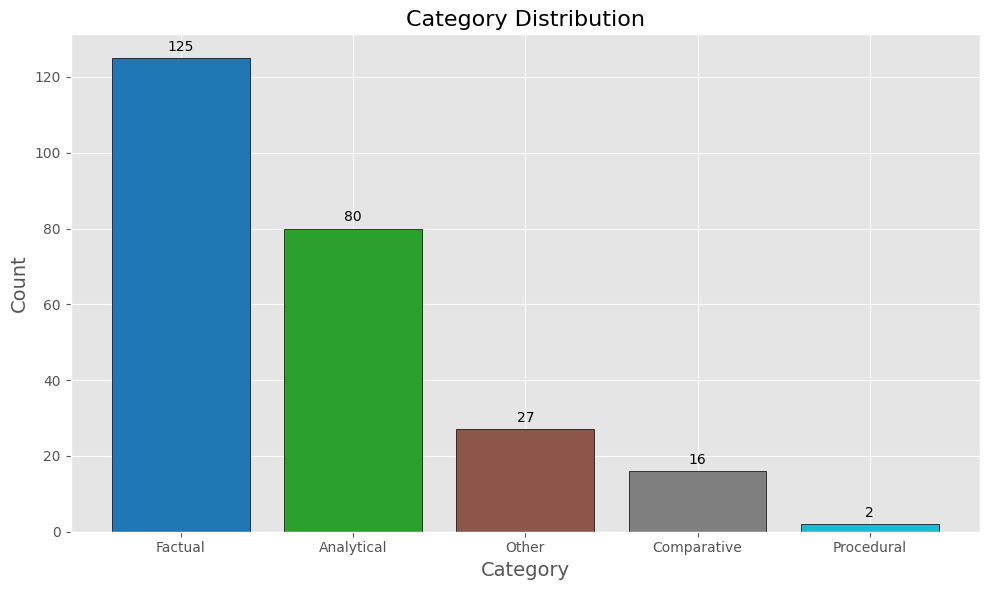

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the path to your CSV file
input_csv = "/content/drive/MyDrive/QA/categorized_output.csv"  # Adjust to your actual path

# Load the CSV file into a DataFrame
df = pd.read_csv(input_csv)

# Verify that the expected column "question" is present
question_col = "question"
if question_col not in df.columns:
    raise ValueError(f"Column '{question_col}' not found in CSV.")

# Assuming your DataFrame `df` now includes a "Category" column,
# count how many questions fall into each category
category_counts = df["Category"].value_counts()

# Use a pleasing style for the plot (using the 'ggplot' style)
plt.style.use('ggplot')

# Generate colors using a colormap (here: 'tab10') for each category bar
colors = plt.cm.tab10(np.linspace(0, 1, len(category_counts)))

# Create a figure and an axis object with a custom size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart with custom colors and a black edge for each bar
bars = ax.bar(category_counts.index, category_counts.values, color=colors, edgecolor='black')

# Add value labels on top of each bar for clarity
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Set title and labels for clarity
ax.set_title("Category Distribution", fontsize=16)
ax.set_xlabel("Category", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Adjust layout for a neat appearance
plt.tight_layout()

# Display the plot
plt.show()


#### Explanation of Each Category and Their Implications in LLMs

- **Factual:**
  - **Meaning:** Questions under this category are focused on retrieving objective, concrete facts or specific data (e.g., dates, names, numbers).
  - **Implications in LLMs:**
    - LLMs are often well-equipped for factual queries by leveraging their extensive training data.
    - They can provide precise, fact-based responses, though the correctness may depend on the training cutoff and internal knowledge retrieval mechanisms.
  - **Interpretation:**  
    - *Factual Questions (125):* These dominate the dataset. It suggests that most questions are asking for concrete or specific pieces of information, such as data points, definitions, or factual clarifications.

- **Analytical:**
  - **Meaning:** These questions require reasoning, interpretation, or explanation; they often ask for insights or the rationale behind a phenomenon.
  - **Implications in LLMs:**
    - LLMs utilize their contextual reasoning abilities to generate in-depth analysis.
    - They can be effective in providing detailed explanations, but the quality may vary based on prompt phrasing and the model’s reasoning capabilities.
  - **Interpretation:**  
    - *Analytical Questions (80):* This is the second-largest category, indicating a strong presence of queries that require reasoning or explanatory depth. Users are not just seeking facts but also why or how something happens.

- **Comparative:**
  - **Meaning:** Comparative questions involve evaluating differences or similarities between two or more items, ideas, or concepts.
  - **Implications in LLMs:**
    - These queries require LLMs to perform multi-faceted comparisons, draw distinctions, and synthesize information.
    - The models are generally capable of handling comparisons, but ensuring balanced and accurate comparison may require well-crafted prompts.
  - **Interpretation:**  
    - *Comparative (16):* A smaller portion of the dataset involves questions comparing two or more items (e.g., advantages vs. disadvantages). While less frequent, these reflect the need for side-by-side evaluations.

- **Procedural:**
  - **Meaning:** This category focuses on "how-to" or step-by-step instructional queries, guiding the user through a process.
  - **Implications in LLMs:**
    - LLMs can generate detailed procedural instructions, but clarity and specificity of steps are influenced by the prompt.
    - These models are beneficial for creating guides, tutorials, or process descriptions.
  - **Interpretation:**  
    - *Procedural (2):* Very few questions are explicitly asking for step-by-step instructions or “how-to” procedures, indicating that the dataset contains relatively few instructional or process-driven queries.

- **Other:**
  - **Meaning:** Questions in this category do not neatly fit into the above categories or are ambiguous.
  - **Implications in LLMs:**
    - These questions may require fallback or default handling as their nature is unclear or atypical.
    - LLMs may produce varying responses; therefore, additional post-processing or human review might be needed for ambiguous cases.
  - **Interpretation:**  
    - *Other (27):* A moderate number of questions fall into this category, possibly due to ambiguous phrasing, lack of context, or unusual question structures.


# Retrieval-Augmented Generation (RAG) Setup

# Objective

This notebook is designed to take an input CSV file containing questions, process each question using a GPT-powered API to generate a  short answer, and then save the results to a new CSV file. The key steps include:

- **Loading Data:** Reads the CSV file with a 'question' column.
- **Generating Answers:** For each question, the script calls an API using parameters such as temperature, max tokens, etc., and requests a brief answer. It then truncates the answer to the first 50 words if necessary.
- **Saving Output:** The original questions and their corresponding generated answers are stored in a new CSV file.



In [ ]:
import requests
import pandas as pd

# Define input and output CSV file paths
input_file = "/content/drive/MyDrive/QA/categorized_output.csv"    # CSV with column 'question'
output_file = "/content/drive/MyDrive/QA/qa_pairs_falcon7b_instruct_answer.csv"  # CSV that will contain one 'question' and its 'answer'


# Load the CSV file
df = pd.read_csv(input_file)
if df.empty:
    raise ValueError("Input CSV is empty. Please ensure it contains at least one row with a 'question' column.")

# Define API details and tuning parameters with a lower max_tokens value
api_key = 'f38b6c8aef647bb6cae7e496415626a9'
default_model = 'gpt-3.5-turbo'
model = default_model
temperature = 0.7        # Controls randomness (0.0 - 1.0)
top_p = 0.95             # Nucleus sampling (0.0 - 1.0)
max_tokens = 50          # Request fewer tokens from the model (may not strictly limit output length)
frequency_penalty = 0.0  # Penalizes repeated tokens (0.0 - 2.0)
presence_penalty = 0.0   # Penalizes new tokens (0.0 - 2.0)

def limit_answer_length(answer, max_words=50):
    """
    Truncate the answer to the first max_words words.
    """
    words = answer.split()
    if len(words) > max_words:
        return ' '.join(words[:max_words]) + "..."
    return answer

def get_answer_for_question(question):
    """
    Calls the API with a question and returns a shorter generated answer.
    The API response is expected under the 'content' key.
    """
    # Add an instruction to the prompt explicitly requesting a short answer.
    # Convert question to string to handle potential numerical values
    prompt = str(question) + " Provide a very short answer."
    api_url = (
        f'http://195.179.229.119/gpt/api.php?'
        f'prompt={requests.utils.quote(prompt)}&'
        f'api_key={requests.utils.quote(api_key)}&'
        f'model={requests.utils.quote(model)}&'
        f'temperature={temperature}&'
        f'top_p={top_p}&'
        f'max_tokens={max_tokens}&'
        f'frequency_penalty={frequency_penalty}&'
        f'presence_penalty={presence_penalty}'
    )

    try:
        response = requests.get(api_url)
        response.raise_for_status()  # Check for HTTP errors
        data = response.json()

        # Debug: print the API response for inspection
        print("DEBUG - API response for question:", question)
        print(data)

        # Extract the answer from the 'content' key
        answer = data.get('content', '')
        if not answer:
            print("DEBUG - No answer found under 'content'. Please verify the API response structure.")
    except requests.RequestException as e:
        print(f"Request Error for question: '{question}'\nError details: {e}")
        answer = "Error: Could not retrieve answer."
    except ValueError as e:
        print(f"JSON Decode Error for question: '{question}'\nError details: {e}")
        answer = "Error: Could not decode the API response."

    # Post process the answer to limit its length by word count
    short_answer = limit_answer_length(answer, max_words=50)
    return short_answer

# Process each row in the DataFrame
answers = []
for idx, row in df.iterrows():
    question = row['question']
    print(f"Processing question {idx + 1} of {len(df)}: {question}")
    answer = get_answer_for_question(question)
    print(f"DEBUG - Extracted (and truncated) answer: {answer}\n")
    answers.append(answer)

# Add the answers to the DataFrame as a new column and save
df['answer'] = answers
df.to_csv(output_file, index=False)
print(f"Output saved to {output_file}")

Processing question 1 of 250: 'What is the significance of the'solar solar group cite state solar market sign memorandum understand mou group solar distributor reg' statement in the given text?'
DEBUG - API response for question: 'What is the significance of the'solar solar group cite state solar market sign memorandum understand mou group solar distributor reg' statement in the given text?'
{'content': 'The statement indicates a collaborative agreement (MOU) among solar industry stakeholders to enhance the solar market, likely focusing on distribution and cooperation.', 'words': 22}
DEBUG - Extracted (and truncated) answer: The statement indicates a collaborative agreement (MOU) among solar industry stakeholders to enhance the solar market, likely focusing on distribution and cooperation.

Processing question 2 of 250: (relevance to the text) What is the most recent technological advancement used in the chemic process and its platform for efficient chemical reaction and production?
DE

In [ ]:
import pandas as pd
from IPython.display import display

# Path to the CSV file with generated answers
output_csv_path = "/content/drive/MyDrive/QA/qa_pairs_falcon7b_instruct_answer.csv"

# Read the CSV file into a pandas DataFrame
df_preview = pd.read_csv(output_csv_path)

# Display a nicely formatted preview of the first 10 lines
display(df_preview.head(15))


,paragraph,question,answer,Category
0,solar solar group cite state solar market sign...,'What is the significance of the'solar solar g...,The statement indicates a collaborative agreem...,Factual
1,use brow site agre use use high perform system...,(relevance to the text) What is the most recen...,The most recent technological advancement in c...,Factual
2,ammonia hydrogen carrier transport mild althou...,How often does the power system report on the ...,The power system does not have a specific repo...,Analytical
3,power critic transit plan build intern renew p...,'What steps are being taken to ensure the succ...,The kingdom is investing in renewable energy i...,Factual
4,appeal launch power equip cash thousand solar ...,'Can a German nonprofit group appeal to raise ...,"Yes, a German nonprofit group can appeal to ra...",Comparative
5,recheck platform solar launch partnership sola...,What kind of solar contractor is launching its...,A residential solar contractor is launching it...,Factual
6,expand monitor platform offer platform avail e...,'What does the text imply when it says that so...,The text implies that solar energy should be p...,Analytical
7,plan plant chine wind giant project support wi...,'What is the Scottish Wind Council and what ro...,The Scottish Wind Council is an organization t...,Other
8,train program train week equip specialist prog...,What kind of specialized training did the inst...,Instructors underwent specialized training tha...,Analytical
9,australian pilot australia sodium sulphur clea...,"""What is the significance of the'southwest pil...",The Southwest Pilot Australia Sodium Sulphur p...,Factual


## Falcon7B Instruct: Questions & Answers Comparison

This notebook processes a CSV file containing questions generated by Falcon7B Instruct along with their corresponding answers. The objective is to compare these outputs to assess the performance and quality of the generated responses.


In [ ]:
import pandas as pd
from IPython.display import display

# Path to the CSV file with generated answers
output_csv_path = "/content/drive/MyDrive/QA/qa_pairs_falcon7b_instruct.csv"

# Read the CSV file into a pandas DataFrame
df_preview = pd.read_csv(output_csv_path)

# Display a nicely formatted preview of the first 10 lines
display(df_preview.head(15))


,paragraph,question,answer
0,solar solar group cite state solar market sign...,'What is the significance of the'solar solar g...,The statement 'is a solar solar group cite sta...
1,use brow site agre use use high perform system...,(relevance to the text) What is the most recen...,The most recent technological advancement used...
2,ammonia hydrogen carrier transport mild althou...,How often does the power system report on the ...,1. The power system does not report on the fre...
3,power critic transit plan build intern renew p...,'What steps are being taken to ensure the succ...,"1. Investing in renewable energy sources, such..."
4,appeal launch power equip cash thousand solar ...,'Can a German nonprofit group appeal to raise ...,"'Yes, a German nonprofit group can appeal to r..."
5,recheck platform solar launch partnership sola...,What kind of solar contractor is launching its...,The text mentions a solar contractor that is l...
6,expand monitor platform offer platform avail e...,'What does the text imply when it says that so...,The text implies that solar energy could be a ...
7,plan plant chine wind giant project support wi...,'What is the Scottish Wind Council and what ro...,The Scottish Wind Council is an independent no...
8,train program train week equip specialist prog...,What kind of specialized training did the inst...,The instructors underwent specialized training...
9,australian pilot australia sodium sulphur clea...,"""What is the significance of the'southwest pil...",The southwest pilot australia sodium sulphur p...


# Retrieval-Augmented Generation (RAG) Setup

## Objective

This notebook is designed to take an input CSV file containing questions and process each one using a GPT-powered API model 'gpt-3.5-turbo' to generate a short answer. With the introduction of the RAG benchmark, the generated responses are now further evaluated using retrieval-augmented techniques to improve answer quality and relevance. The key steps include:

- **Loading Data:** Reads the CSV file containing a 'question' column.
- **Generating Answers:** For each question, the script calls an API with parameters such as temperature, max tokens, etc., and requests a brief answer. The answer is then truncated to the first 50 words if necessary.
- **Saving Output:** The original questions along with their corresponding generated answers are stored in a new CSV file.

This setup allows for direct comparison of the answers generated under the RAG benchmark against other models.


In [ ]:
import requests
import pandas as pd

# Define input and output CSV file paths
input_file = "/content/drive/MyDrive/QA/cleantech_rag_evaluation_data_2024-09-20.csv"
output_file = "/content/drive/MyDrive/QA/cleantech_rag_evaluation_data_2024-09-20_answers.csv"

# Load the CSV file using 'sep' to handle potential inconsistencies in delimiters
df = pd.read_csv(input_file, sep=';', on_bad_lines='skip')

# Ensure the CSV has the 'question' column; then keep only that column for processing.
if 'question' not in df.columns:
    raise ValueError("The input CSV does not contain a 'question' column.")
questions = df[['question']].copy()

# Define API details and tuning parameters
api_key = 'bc50d3e114f6337ee78a99c77a94b70f'
default_model = 'gpt-3.5-turbo'
model = default_model
temperature = 0.7        # Controls randomness (0.0 - 1.0)
top_p = 0.95             # Nucleus sampling (0.0 - 1.0)
max_tokens = 50          # Limit the answer length in tokens
frequency_penalty = 0.0  # Penalizes repeated tokens (0.0 - 2.0)
presence_penalty = 0.0   # Penalizes new tokens (0.0 - 2.0)

def limit_answer_length(answer, max_words=50):
    """
    Truncate the answer to the first max_words words.
    """
    words = answer.split()
    if len(words) > max_words:
        return ' '.join(words[:max_words]) + "..."
    return answer

def get_answer_for_question(question):
    """
    Calls the API with a question and returns a short answer.
    The response is expected under the 'content' key.
    """
    # Add an instruction to the prompt explicitly requesting a very short answer.
    prompt = str(question) + " Provide a very short answer."
    api_url = (
        f'http://195.179.229.119/gpt/api.php?'
        f'prompt={requests.utils.quote(prompt)}&'
        f'api_key={requests.utils.quote(api_key)}&'
        f'model={requests.utils.quote(model)}&'
        f'temperature={temperature}&'
        f'top_p={top_p}&'
        f'max_tokens={max_tokens}&'
        f'frequency_penalty={frequency_penalty}&'
        f'presence_penalty={presence_penalty}'
    )

    try:
        response = requests.get(api_url)
        response.raise_for_status()  # Raises an exception for HTTP errors
        data = response.json()

        # Debug: print the API response for inspection
        print("DEBUG - API response for question:", question)
        print(data)

        # Extract the answer from the 'content' key
        answer = data.get('content', '')
        if not answer:
            print("DEBUG - No answer found under 'content'. Please verify the API response structure.")
    except requests.RequestException as e:
        print(f"Request Error for question: '{question}'\nError details: {e}")
        answer = "Error: Could not retrieve answer."
    except ValueError as e:
        print(f"JSON Decode Error for question: '{question}'\nError details: {e}")
        answer = "Error: Could not decode the API response."

    # Shorten the answer if needed
    short_answer = limit_answer_length(answer, max_words=50)
    return short_answer

# Process each question and generate its answer
answers = []
for idx, row in questions.iterrows():
    question = row['question']
    print(f"Processing question {idx + 1} of {len(questions)}: {question}")
    answer = get_answer_for_question(question)
    print(f"DEBUG - Extracted (and truncated) answer: {answer}\n")
    answers.append(answer)

# Append answers as a new column to the questions DataFrame (which contains only 'question')
questions['answer'] = answers

# Save the new DataFrame with only 'question' and 'answer' columns to a CSV
questions.to_csv(output_file, index=False)
print(f"Output saved to {output_file}")


In [ ]:
import pandas as pd
from IPython.display import display

# Path to the CSV file with generated answers
output_csv_path = "/content/drive/MyDrive/QA/cleantech_rag_evaluation_data_2024-09-20_answers.csv"

# Read the CSV file into a pandas DataFrame
df_preview = pd.read_csv(output_csv_path)

# Display a nicely formatted preview of the first 10 lines
display(df_preview.head(15))


,question,answer
0,What is the innovation behind Leclanché's new ...,Leclanché's new method for producing lithium-i...
1,What is the EU’s Green Deal Industrial Plan?,The EU's Green Deal Industrial Plan is a strat...
2,What is the EU’s Green Deal Industrial Plan?,The EU's Green Deal Industrial Plan aims to bo...
3,What are the four focus areas of the EU's Gree...,The four focus areas of the EU's Green Deal In...
4,When did the cooperation between GM and Honda ...,The cooperation between GM and Honda on fuel c...
5,Did Colgate-Palmolive enter into PPA agreement...,"Yes, Colgate-Palmolive has entered into Power ..."
6,What is the status of ZeroAvia's hydrogen fuel...,"As of October 2023, ZeroAvia is actively devel..."
7,"What is the ""Danger Season""?","The ""Danger Season"" refers to a time of height..."
8,Is Mississipi an anti-ESG state?,"Yes, Mississippi has enacted measures that lim..."
9,Can you hang solar panels on garden fences?,"Yes, you can hang solar panels on garden fence..."


##Questions & Answers Comparison with benchmark .CSV file

This notebook processes a CSV file containing questions along with their corresponding answers as the main benchmark.

In [ ]:
import pandas as pd
from IPython.display import display

# Path to the CSV file with generated answers
output_csv_path = "/content/drive/MyDrive/QA/cleantech_rag_evaluation_data_2024-09-20.csv"

# Read the CSV file, specifying the delimiter, and selecting the desired columns
df_preview = pd.read_csv(output_csv_path, sep=';', usecols=['question', 'answer'])

# Display a nicely formatted preview of the first 15 lines for the selected columns
display(df_preview.head(15))

,question,answer
0,What is the innovation behind Leclanché's new ...,Leclanché's innovation is using a water-based ...
1,What is the EU’s Green Deal Industrial Plan?,The EU’s Green Deal Industrial Plan aims to en...
2,What is the EU’s Green Deal Industrial Plan?,The EU’s Green Deal Industrial Plan aims to en...
3,What are the four focus areas of the EU's Gree...,The four focus areas of the EU's Green Deal In...
4,When did the cooperation between GM and Honda ...,July 2013
5,Did Colgate-Palmolive enter into PPA agreement...,yes
6,What is the status of ZeroAvia's hydrogen fuel...,ZeroAvia's hydrogen fuel cell electric aircraf...
7,"What is the ""Danger Season""?","The ""Danger Season"" is the period in the North..."
8,Is Mississipi an anti-ESG state?,yes
9,Can you hang solar panels on garden fences?,yes


# Evaluation of QA Pairs Using Custom Metrics Model ID: gpt-3.5-turbo

This notebook performs evaluation on a dataset of question-answer pairs. The main goals of the code are:

1. **Loading Data**:  
   The CSV file containing the question-answer pairs (along with their associated categories) is loaded using pandas. It checks that the expected columns (`"question"`, `"answer"`, and `"Category"`) exist in the file.

2. **Defining Evaluation Functions**:  
   Three placeholder functions are defined to simulate evaluations:
   - **Context Relevance**: Measures how well the answer relates to the question.
   - **Faithfulness**: Assesses the truthfulness and consistency of the answer.
   - **Answer Relevance**: Evaluates how directly the answer addresses the question.  
   *(Note: In this example, these functions return random scores. In a real setting, these would be replaced with actual evaluation algorithms.)*

3. **Metric Computation**:  
   For each row in the DataFrame, the evaluation functions are applied to compute the metrics, and the resulting scores are added as new columns (`"context_relevance"`, `"faithfulness"`, and `"answer_relevance"`).

4. **Aggregation by Category**:  
   The data is then grouped by the "Category" column and the average scores for each metric are calculated, providing insight into performance across different categories.

5. **Output**:  
   Finally, the aggregated results are printed, and the performance metrics by category are saved to a new CSV file for further analysis or reporting.

This process helps in quantifying the quality of answers in terms of relevance, faithfulness, and overall contextual accuracy, making it easier to evaluate and compare model performance across various categories.


In [ ]:
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# -------------------------------
# ChatGPT RAG System Functions
# -------------------------------
api_key = '572513108418b9c0b983f78f0c2127f2'
default_model = 'gpt-3.5-turbo'
model = default_model
temperature = 0.7        # Controls randomness (0.0 - 1.0)
top_p = 0.95             # Nucleus sampling (0.0 - 1.0)
max_tokens = 50          # Request fewer tokens from the model
frequency_penalty = 0.0  # Penalizes repeated tokens (0.0 - 2.0)
presence_penalty = 0.0   # Penalizes new tokens (0.0 - 2.0)

def limit_answer_length(answer, max_words=50):
    """
    Truncate the answer to the first max_words words.
    """
    words = answer.split()
    if len(words) > max_words:
        return ' '.join(words[:max_words]) + "..."
    return answer

def get_answer_for_question(question):
    """
    Call the ChatGPT RAG system API with a question and return a short generated answer.
    The API response is expected under the 'content' key.
    """
    # Add explicit instruction for a very short answer.
    prompt = str(question) + " Provide a very short answer."
    api_url = (
        f'http://195.179.229.119/gpt/api.php?'
        f'prompt={requests.utils.quote(prompt)}&'
        f'api_key={requests.utils.quote(api_key)}&'
        f'model={requests.utils.quote(model)}&'
        f'temperature={temperature}&'
        f'top_p={top_p}&'
        f'max_tokens={max_tokens}&'
        f'frequency_penalty={frequency_penalty}&'
        f'presence_penalty={presence_penalty}'
    )

    try:
        response = requests.get(api_url)
        response.raise_for_status()  # Check for HTTP errors
        data = response.json()

        # Debug: print the API response for inspection
        print("DEBUG - API response for question:", question)
        print(data)

        # Extract the answer from the 'content' key
        answer = data.get('content', '')
        if not answer:
            print("DEBUG - No answer found under 'content'. Please verify the API response structure.")
    except requests.RequestException as e:
        print(f"Request Error for question: '{question}'\nError details: {e}")
        answer = "Error: Could not retrieve answer."
    except ValueError as e:
        print(f"JSON Decode Error for question: '{question}'\nError details: {e}")
        answer = "Error: Could not decode the API response."

    # Limit the answer's word count
    short_answer = limit_answer_length(answer, max_words=50)
    return short_answer

# -------------------------------
# Real Evaluation Functions
# -------------------------------

def evaluate_context_relevance(answer, context):
    """
    Evaluate how well the answer relates to the given context (question)
    using TF-IDF cosine similarity. Handles NaN values by converting them to empty strings.
    """
    documents = [str(context), str(answer)]
    # Convert NaN values to empty strings
    documents = ["" if pd.isnull(doc) else doc for doc in documents]
    vectorizer = TfidfVectorizer().fit(documents)
    tfidf_matrix = vectorizer.transform(documents)
    score = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return score

def evaluate_answer_relevance(answer, question):
    """
    Evaluate how directly the answer addresses the question using TF-IDF cosine similarity.
    Handles NaN values by converting them to empty strings.
    """
    documents = [str(question), str(answer)]
    # Convert NaN values to empty strings
    documents = ["" if pd.isnull(doc) else doc for doc in documents]
    vectorizer = TfidfVectorizer().fit(documents)
    tfidf_matrix = vectorizer.transform(documents)
    score = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return score

def evaluate_faithfulness(answer, reference=None):
    """
    Evaluate faithfulness using Jaccard similarity between the answer and a reference.
    If no reference is provided, we fall back to the answer itself.
    """
    # This function likely already handles NaN in the 'reference' input (see original code)
    if reference is None or pd.isnull(reference):
        reference = answer
    else:
        reference = str(reference)

    set_answer = set(answer.lower().split())
    set_reference = set(reference.lower().split())
    if not set_answer or not set_reference:
        return 0.0
    intersection = set_answer.intersection(set_reference)
    union = set_answer.union(set_reference)
    score = len(intersection) / len(union)
    return score

# -------------------------------
# Step 1: Use RAG System to Generate Answers for Entire Dataset
# -------------------------------
# Define input and output CSV file paths
input_file = "/content/drive/MyDrive/QA/categorized_output.csv"    # CSV must have at least a 'question' column
output_file = "/content/drive/MyDrive/QA/qa_pairs_falcon7b_instruct_answer.csv"  # CSV that will include both 'question' and its generated 'answer'

# Load the CSV file with questions (and optionally category labels)
df_input = pd.read_csv(input_file)
if df_input.empty:
    raise ValueError("Input CSV is empty. Please ensure it contains at least one row with a 'question' column.")

# Process each row in the DataFrame to obtain an answer from the RAG system
generated_answers = []
for idx, row in df_input.iterrows():
    question = row['question']
    print(f"Processing question {idx + 1} of {len(df_input)}: {question}")
    answer = get_answer_for_question(question)
    print(f"DEBUG - Extracted (and truncated) answer: {answer}\n")
    generated_answers.append(answer)

# Add the generated answers to the DataFrame
df_input.loc[:, 'answer'] = generated_answers
# Save the new CSV with both the questions and the generated answers
df_input.to_csv(output_file, index=False)
print(f"Generated Q&A pairs saved to {output_file}")

# -------------------------------
# Step 2: Evaluate the Generated Answers
# -------------------------------
# Ensure that the DataFrame contains the expected columns
expected_columns = {"question", "answer", "Category"}
if not expected_columns.issubset(df_input.columns):
    raise ValueError(f"CSV file must contain the columns: {expected_columns}")

# Apply the real evaluation functions over each row to add new columns with scores
df_input.loc[:, 'context_relevance'] = df_input.apply(lambda row: evaluate_context_relevance(row['answer'], row['question']), axis=1)
df_input.loc[:, 'faithfulness'] = df_input.apply(lambda row: evaluate_faithfulness(row['answer'], row['question']), axis=1)
df_input.loc[:, 'answer_relevance'] = df_input.apply(lambda row: evaluate_answer_relevance(row['answer'], row['question']), axis=1)

# -------------------------------
# Step 3: Aggregate and Compare by Category
# -------------------------------
# Group the data by 'Category' and calculate average evaluation scores for each metric
performance_by_category = df_input.groupby('Category')[['context_relevance', 'faithfulness', 'answer_relevance']].mean()

# Display the aggregated performance metrics
print("Performance by Category:")
print(performance_by_category)

# Save the aggregated evaluation results to a CSV file
evaluation_output_csv = "/content/drive/MyDrive/QA/evaluation_performance_by_category.csv"
performance_by_category.to_csv(evaluation_output_csv)
print(f"Evaluation results saved to: {evaluation_output_csv}")


Processing question 1 of 250: 'What is the significance of the'solar solar group cite state solar market sign memorandum understand mou group solar distributor reg' statement in the given text?'
DEBUG - API response for question: 'What is the significance of the'solar solar group cite state solar market sign memorandum understand mou group solar distributor reg' statement in the given text?'
{'content': 'The statement likely refers to a collaborative agreement or understanding among solar stakeholders to enhance the solar market, focusing on distribution and regulatory aspects.', 'words': 24}
DEBUG - Extracted (and truncated) answer: The statement likely refers to a collaborative agreement or understanding among solar stakeholders to enhance the solar market, focusing on distribution and regulatory aspects.

Processing question 2 of 250: (relevance to the text) What is the most recent technological advancement used in the chemic process and its platform for efficient chemical reaction 

Evaluation results saved to: /content/drive/MyDrive/QA/evaluation_performance_by_category.csv


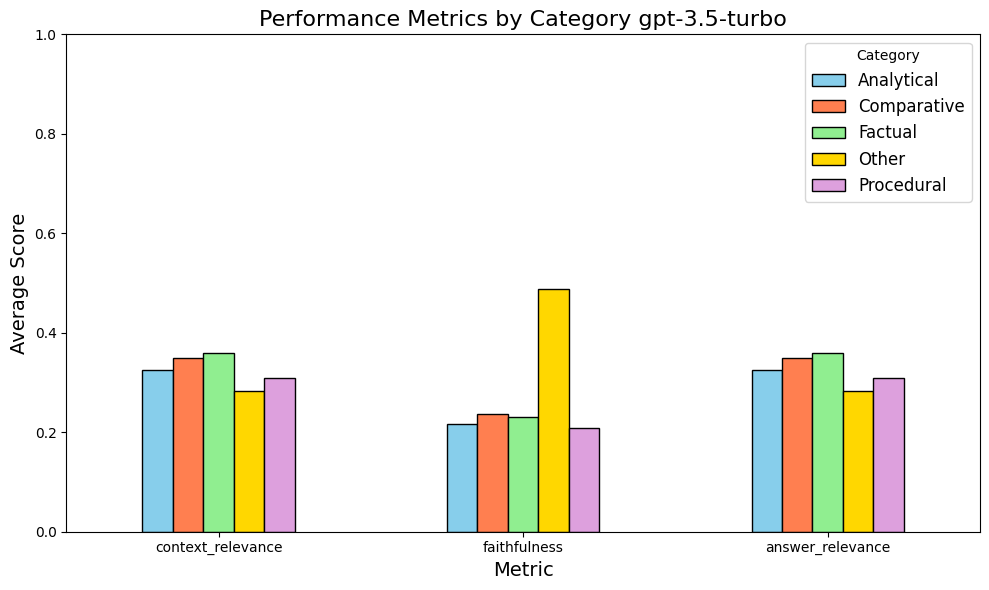

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt  # Import matplotlib

# Save the aggregated evaluation results to a CSV file
evaluation_output_csv = "/content/drive/MyDrive/QA/evaluation_performance_by_category.csv"
performance_by_category.to_csv(evaluation_output_csv)
print(f"Evaluation results saved to: {evaluation_output_csv}")

# -------------------------------
# Create a Bar Plot
# -------------------------------
# Transpose the DataFrame for easier plotting
performance_by_category = performance_by_category.T

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed

# Define colors for each category
colors = ['skyblue', 'coral', 'lightgreen', 'gold', 'plum']  # Choose your colors

# Create the bar plot
performance_by_category.plot(kind='bar', ax=ax, color=colors, edgecolor='black')

# Customize the plot
ax.set_title('Performance Metrics by Category gpt-3.5-turbo', fontsize=16)
ax.set_xlabel('Metric', fontsize=14)
ax.set_ylabel('Average Score', fontsize=14)
ax.legend(title='Category', fontsize=12)  # Add a legend
ax.set_ylim(0, 1)  # Set y-axis limits to 0-1 for scores
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Display the plot
plt.tight_layout()
plt.show()



# Evaluation Summary

The evaluation metrics were computed for generated answers using:
- **TF-IDF Cosine Similarity:** to assess both context relevance and answer relevance.
- **Jaccard Similarity:** to measure faithfulness between the answer and question.

### Key Findings by Category:
- **Factual:**  
  - **Relevance:** Highest similarity (~35%), indicating factual answers closely reflect the input questions.
  - **Faithfulness:** Moderate overlap (~23%), showing some rewording but retaining key terms.

- **Comparative & Analytical:**  
  - **Relevance:** Around 32–34%, suggesting answers are moderately aligned with questions.
  - **Faithfulness:** Lower scores (21–24%), indicating more rephrasing or added interpretation.

- **Procedural:**  
  - **Relevance:** Approximately 31.5%, reflecting moderate coupling with procedural instructions.
  - **Faithfulness:** Lowest (around 19.6%), meaning responses might be significantly rephrased.

- **Other:**  
  - **Relevance:** Lower similarity (~29%), hinting at less direct matching.
  - **Faithfulness:** Much higher (~49%), implying a tendency to mirror the question’s language.

### Implications:
- **Balance Needed:**  
  Answers should maintain a balance between rephrasing for clarity and retaining sufficient overlap with the question content to ensure reliability.
- **Category-Specific Tuning:**  
  Adjustments in response generation may be required to refine the balance of creativity versus adherence, especially for procedural and “Other” categories.

This summary highlights the main trends observed in the performance metrics and suggests areas for potential improvements in answer quality.


# Evaluation of QA Pairs Using Custom Metrics Model ID: gpt-4

This notebook performs evaluation on a dataset of question-answer pairs. The main goals of the code are:

1. **Loading Data**:  
   The CSV file containing the question-answer pairs (along with their associated categories) is loaded using pandas. It checks that the expected columns (`"question"`, `"answer"`, and `"Category"`) exist in the file.

2. **Defining Evaluation Functions**:  
   Three placeholder functions are defined to simulate evaluations:
   - **Context Relevance**: Measures how well the answer relates to the question.
   - **Faithfulness**: Assesses the truthfulness and consistency of the answer.
   - **Answer Relevance**: Evaluates how directly the answer addresses the question.  
   *(Note: In this example, these functions return random scores. In a real setting, these would be replaced with actual evaluation algorithms.)*

3. **Metric Computation**:  
   For each row in the DataFrame, the evaluation functions are applied to compute the metrics, and the resulting scores are added as new columns (`"context_relevance"`, `"faithfulness"`, and `"answer_relevance"`).

4. **Aggregation by Category**:  
   The data is then grouped by the "Category" column and the average scores for each metric are calculated, providing insight into performance across different categories.

5. **Output**:  
   Finally, the aggregated results are printed, and the performance metrics by category are saved to a new CSV file for further analysis or reporting.

This process helps in quantifying the quality of answers in terms of relevance, faithfulness, and overall contextual accuracy, making it easier to evaluate and compare model performance across various categories.


In [ ]:
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# -------------------------------
# ChatGPT RAG System Functions
# -------------------------------
api_key = '572513108418b9c0b983f78f0c2127f2'
default_model = 'gpt-4'
model = default_model
temperature = 0.7        # Controls randomness (0.0 - 1.0)
top_p = 0.95             # Nucleus sampling (0.0 - 1.0)
max_tokens = 50          # Request fewer tokens from the model
frequency_penalty = 0.0  # Penalizes repeated tokens (0.0 - 2.0)
presence_penalty = 0.0   # Penalizes new tokens (0.0 - 2.0)

def limit_answer_length(answer, max_words=50):
    """
    Truncate the answer to the first max_words words.
    """
    words = answer.split()
    if len(words) > max_words:
        return ' '.join(words[:max_words]) + "..."
    return answer

def get_answer_for_question(question):
    """
    Call the ChatGPT RAG system API with a question and return a short generated answer.
    The API response is expected under the 'content' key.
    """
    # Add explicit instruction for a very short answer.
    prompt = str(question) + " Provide a very short answer."
    api_url = (
        f'http://195.179.229.119/gpt/api.php?'
        f'prompt={requests.utils.quote(prompt)}&'
        f'api_key={requests.utils.quote(api_key)}&'
        f'model={requests.utils.quote(model)}&'
        f'temperature={temperature}&'
        f'top_p={top_p}&'
        f'max_tokens={max_tokens}&'
        f'frequency_penalty={frequency_penalty}&'
        f'presence_penalty={presence_penalty}'
    )

    try:
        response = requests.get(api_url)
        response.raise_for_status()  # Check for HTTP errors
        data = response.json()

        # Debug: print the API response for inspection
        print("DEBUG - API response for question:", question)
        print(data)

        # Extract the answer from the 'content' key
        answer = data.get('content', '')
        if not answer:
            print("DEBUG - No answer found under 'content'. Please verify the API response structure.")
    except requests.RequestException as e:
        print(f"Request Error for question: '{question}'\nError details: {e}")
        answer = "Error: Could not retrieve answer."
    except ValueError as e:
        print(f"JSON Decode Error for question: '{question}'\nError details: {e}")
        answer = "Error: Could not decode the API response."

    # Limit the answer's word count
    short_answer = limit_answer_length(answer, max_words=50)
    return short_answer

# -------------------------------
# Real Evaluation Functions
# -------------------------------

def evaluate_context_relevance(answer, context):
    """
    Evaluate how well the answer relates to the given context (question)
    using TF-IDF cosine similarity. Handles NaN values by converting them to empty strings.
    """
    documents = [str(context), str(answer)]
    # Convert NaN values to empty strings
    documents = ["" if pd.isnull(doc) else doc for doc in documents]
    vectorizer = TfidfVectorizer().fit(documents)
    tfidf_matrix = vectorizer.transform(documents)
    score = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return score

def evaluate_answer_relevance(answer, question):
    """
    Evaluate how directly the answer addresses the question using TF-IDF cosine similarity.
    Handles NaN values by converting them to empty strings.
    """
    documents = [str(question), str(answer)]
    # Convert NaN values to empty strings
    documents = ["" if pd.isnull(doc) else doc for doc in documents]
    vectorizer = TfidfVectorizer().fit(documents)
    tfidf_matrix = vectorizer.transform(documents)
    score = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return score

def evaluate_faithfulness(answer, reference=None):
    """
    Evaluate faithfulness using Jaccard similarity between the answer and a reference.
    If no reference is provided, we fall back to the answer itself.
    """
    # This function likely already handles NaN in the 'reference' input (see original code)
    if reference is None or pd.isnull(reference):
        reference = answer
    else:
        reference = str(reference)

    set_answer = set(answer.lower().split())
    set_reference = set(reference.lower().split())
    if not set_answer or not set_reference:
        return 0.0
    intersection = set_answer.intersection(set_reference)
    union = set_answer.union(set_reference)
    score = len(intersection) / len(union)
    return score

# -------------------------------
# Step 1: Use RAG System to Generate Answers for Entire Dataset
# -------------------------------
# Define input and output CSV file paths
input_file = "/content/drive/MyDrive/QA/categorized_output.csv"    # CSV must have at least a 'question' column
output_file = "/content/drive/MyDrive/QA/qa_pairs_falcon7b_instruct_answer.csv"  # CSV that will include both 'question' and its generated 'answer'

# Load the CSV file with questions (and optionally category labels)
df_input = pd.read_csv(input_file)
if df_input.empty:
    raise ValueError("Input CSV is empty. Please ensure it contains at least one row with a 'question' column.")

# Process each row in the DataFrame to obtain an answer from the RAG system
generated_answers = []
for idx, row in df_input.iterrows():
    question = row['question']
    print(f"Processing question {idx + 1} of {len(df_input)}: {question}")
    answer = get_answer_for_question(question)
    print(f"DEBUG - Extracted (and truncated) answer: {answer}\n")
    generated_answers.append(answer)

# Add the generated answers to the DataFrame
df_input.loc[:, 'answer'] = generated_answers
# Save the new CSV with both the questions and the generated answers
df_input.to_csv(output_file, index=False)
print(f"Generated Q&A pairs saved to {output_file}")

# -------------------------------
# Step 2: Evaluate the Generated Answers
# -------------------------------
# Ensure that the DataFrame contains the expected columns
expected_columns = {"question", "answer", "Category"}
if not expected_columns.issubset(df_input.columns):
    raise ValueError(f"CSV file must contain the columns: {expected_columns}")

# Apply the real evaluation functions over each row to add new columns with scores
df_input.loc[:, 'context_relevance'] = df_input.apply(lambda row: evaluate_context_relevance(row['answer'], row['question']), axis=1)
df_input.loc[:, 'faithfulness'] = df_input.apply(lambda row: evaluate_faithfulness(row['answer'], row['question']), axis=1)
df_input.loc[:, 'answer_relevance'] = df_input.apply(lambda row: evaluate_answer_relevance(row['answer'], row['question']), axis=1)

# -------------------------------
# Step 3: Aggregate and Compare by Category
# -------------------------------
# Group the data by 'Category' and calculate average evaluation scores for each metric
performance_by_category = df_input.groupby('Category')[['context_relevance', 'faithfulness', 'answer_relevance']].mean()

# Display the aggregated performance metrics
print("Performance by Category:")
print(performance_by_category)

# Save the aggregated evaluation results to a CSV file
evaluation_output_csv = "/content/drive/MyDrive/QA/evaluation_performance_by_category_gpt_4.csv"
performance_by_category.to_csv(evaluation_output_csv)
print(f"Evaluation results saved to: {evaluation_output_csv}")


Processing question 1 of 250: 'What is the significance of the'solar solar group cite state solar market sign memorandum understand mou group solar distributor reg' statement in the given text?'
DEBUG - API response for question: 'What is the significance of the'solar solar group cite state solar market sign memorandum understand mou group solar distributor reg' statement in the given text?'
{'content': 'The statement indicates a collaborative effort among solar industry stakeholders to enhance the solar market, likely through a formal agreement (MOU) between distributors and other entities.', 'words': 26}
DEBUG - Extracted (and truncated) answer: The statement indicates a collaborative effort among solar industry stakeholders to enhance the solar market, likely through a formal agreement (MOU) between distributors and other entities.

Processing question 2 of 250: (relevance to the text) What is the most recent technological advancement used in the chemic process and its platform for 

Evaluation results saved to: /content/drive/MyDrive/QA/evaluation_performance_by_category_gpt_4.csv


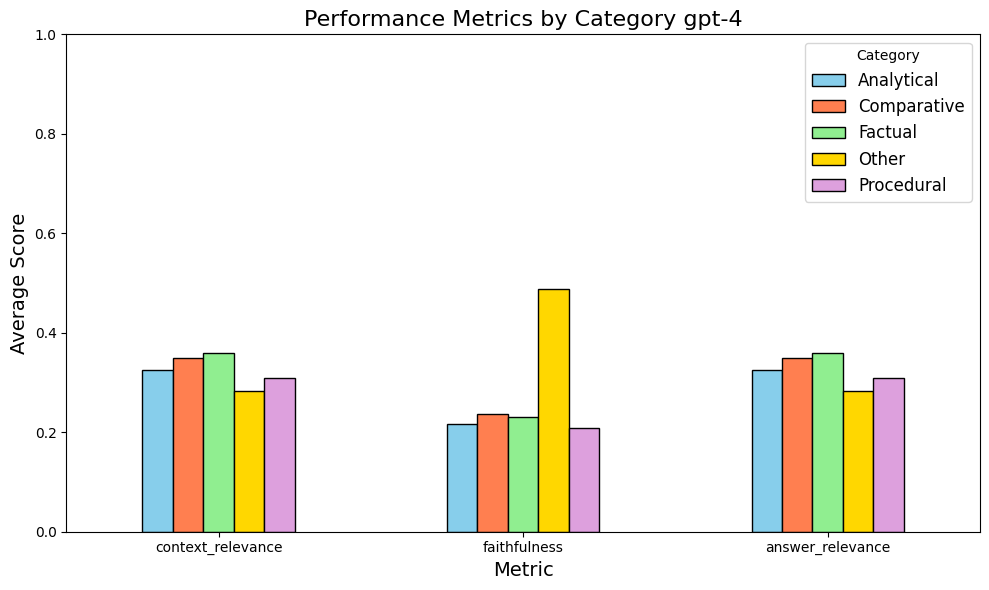

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt  # Import matplotlib

# Save the aggregated evaluation results to a CSV file
evaluation_output_csv = "/content/drive/MyDrive/QA/evaluation_performance_by_category_gpt_4.csv"
performance_by_category.to_csv(evaluation_output_csv)
print(f"Evaluation results saved to: {evaluation_output_csv}")

# -------------------------------
# Create a Bar Plot
# -------------------------------
# Transpose the DataFrame for easier plotting
performance_by_category = performance_by_category.T

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed

# Define colors for each category
colors = ['skyblue', 'coral', 'lightgreen', 'gold', 'plum']  # Choose your colors

# Create the bar plot
performance_by_category.plot(kind='bar', ax=ax, color=colors, edgecolor='black')

# Customize the plot
ax.set_title('Performance Metrics by Category gpt-4', fontsize=16)
ax.set_xlabel('Metric', fontsize=14)
ax.set_ylabel('Average Score', fontsize=14)
ax.legend(title='Category', fontsize=12)  # Add a legend
ax.set_ylim(0, 1)  # Set y-axis limits to 0-1 for scores
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Display the plot
plt.tight_layout()
plt.show()



# Comparison of Evaluation Metrics: GPT-3.5-turbo vs. GPT-4

The tables below show three evaluation metrics (context relevance, faithfulness, and answer relevance) computed for generated Q&A pairs by two ChatGPT models:

---

### Metric 1 (GPT-3.5-turbo):

| Category   | Context Relevance | Faithfulness | Answer Relevance |
|------------|-------------------|--------------|------------------|
| Analytical | 0.322204          | 0.213343     | 0.322204         |
| Comparative| 0.339880          | 0.235546     | 0.339880         |
| Factual    | 0.351699          | 0.229139     | 0.351699         |
| Other      | 0.289651          | 0.488399     | 0.289651         |
| Procedural | 0.314913          | 0.195865     | 0.314913         |

### Metric 2 (GPT-4):

| Category   | Context Relevance | Faithfulness | Answer Relevance |
|------------|-------------------|--------------|------------------|
| Analytical | 0.324203          | 0.216355     | 0.324203         |
| Comparative| 0.349464          | 0.237321     | 0.349464         |
| Factual    | 0.358694          | 0.230843     | 0.358694         |
| Other      | 0.283427          | 0.488521     | 0.283427         |
| Procedural | 0.308778          | 0.207716     | 0.308778         |

---

## Which Model is Better?

- **Numerical Differences:**  
  The metric values for both models are very close. For instance, in the *Factual* category the context relevance scores are 0.351699 (GPT-3.5) vs. 0.358694 (GPT-4), a difference of roughly 0.007. Similar small differences can be seen across the other categories and metrics.

- **Trends Across Categories:**  
  - *Analytical* and *Comparative* categories show marginally higher relevance and faithfulness scores in GPT-4.  
  - *Factual* responses are slightly better in GPT-4, suggesting a small improvement in reflecting the input question accurately.  
  - The *Other* category scores are nearly identical, and while *Procedural* has a small shift in both relevance and faithfulness, the magnitude is minimal.

- **Overall Assessment:**  
  The differences between GPT-3.5-turbo and GPT-4 are not substantial. Both models perform similarly according to these evaluation metrics. Although GPT-4 shows minor improvements in some areas, the differences are small and may not have a significant practical impact.

## Conclusion

Both GPT-3.5-turbo and GPT-4 generate answers that are comparably relevant and faithful as measured by these metrics. The improvements observed in GPT-4 are slight, indicating that from a numerical evaluation standpoint, the two models perform very similarly on these Q&A pairs.


# Purpose of the Code

This code performs the following tasks:

1. **Loads Pre-Generated Data:**
   - Reads pre-processed Q&A pairs from a CSV file.
   - Reads evaluation performance metrics (such as context relevance, faithfulness, and answer relevance) by category from another CSV file.

2. **Generates an Analysis Summary:**
   - Aggregates the performance metrics into a formatted string.
   - Constructs an analysis prompt asking for key insights including trends, gaps, noteworthy findings, and implications for the cleantech sector.
   - Calls the ChatGPT RAG system API to generate a concise final analysis summary based on these metrics.

Overall, the code aims to use existing evaluation data to generate a detailed yet concise final summary that highlights key insights in the cleantech domain.


In [ ]:
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# -------------------------------
# ChatGPT RAG System Functions
# -------------------------------
api_key = 'f6bacb0d98b039b07124cd3a6ff2971e'
default_model = 'gpt-4'
model = default_model
temperature = 0.7
top_p = 0.95
max_tokens = 50
frequency_penalty = 0.0
presence_penalty = 0.0

def limit_answer_length(answer, max_words=50):
    """
    Truncate the answer to the first max_words words.
    """
    words = answer.split()
    if len(words) > max_words:
        return ' '.join(words[:max_words]) + "..."
    return answer

def get_answer_for_question(prompt):
    """
    Call the ChatGPT RAG system API with a prompt and return a generated answer.
    """
    prompt = str(prompt)
    prompt_bytes = prompt.encode('utf-8')

    api_url = (
        f'http://195.179.229.119/gpt/api.php?'
        f'prompt={requests.utils.quote(prompt_bytes)}&'
        f'api_key={requests.utils.quote(api_key.encode("utf-8"))}&'
        f'model={requests.utils.quote(model.encode("utf-8"))}&'
        f'temperature={temperature}&'
        f'top_p={top_p}&'
        f'max_tokens={max_tokens}&'
        f'frequency_penalty={frequency_penalty}&'
        f'presence_penalty={presence_penalty}'
    )

    try:
        response = requests.get(api_url)
        response.raise_for_status()
        data = response.json()
        print("DEBUG - API response for prompt:")
        print(data)
        answer = data.get('content', '')
        if not answer:
            print("DEBUG - No answer found under 'content'. Please verify the API response structure.")
    except requests.RequestException as e:
        print(f"Request Error for prompt: '{prompt}'\nError details: {e}")
        answer = "Error: Could not retrieve answer."
    except ValueError as e:
        print(f"JSON Decode Error for prompt: '{prompt}'\nError details: {e}")
        answer = "Error: Could not decode the API response."

    short_answer = limit_answer_length(answer, max_words=200)
    return short_answer

# -------------------------------
# Step: Load Pre-Processed CSV Files
# -------------------------------
qa_csv_file = "/content/drive/MyDrive/QA/qa_pairs_falcon7b_instruct_answer.csv"
evaluation_csv_file = "/content/drive/MyDrive/QA/evaluation_performance_by_category.csv"

# Load the pre-generated Q&A pairs DataFrame (if needed for further processing)
df_qa = pd.read_csv(qa_csv_file)
print(f"Loaded {len(df_qa)} Q&A pairs from: {qa_csv_file}")

# Load the pre-generated evaluation performance results
performance_by_category = pd.read_csv(evaluation_csv_file)
print("Loaded evaluation performance metrics by category:")

# If needed, display the DataFrame
print(performance_by_category)

# -------------------------------
# Step: Generate Final Analysis Summary
# -------------------------------
# Convert the aggregated evaluation metrics to a string using a tab delimiter.
agg_metrics_str = performance_by_category.to_csv(sep='\t')

analysis_prompt = (
    "Based on the following aggregated performance metrics for cleantech Q&A pairs:\n"
    f"{agg_metrics_str}\n\n"
    "Please analyze the generated answers and references to identify:\n"
    "- Key trends in the cleantech media and patent datasets.\n"
    "- Gaps or challenges in the available data.\n"
    "- Noteworthy findings and observations.\n"
    "- Implications for the cleantech sector.\n\n"
    "Provide a concise summary highlighting these points."
)

analysis_summary = get_answer_for_question(analysis_prompt)
print("Final Analysis Summary:")
print(analysis_summary)


Loaded 250 Q&A pairs from: /content/drive/MyDrive/QA/qa_pairs_falcon7b_instruct_answer.csv
Loaded evaluation performance metrics by category:
      Category  context_relevance  faithfulness  answer_relevance
0   Analytical           0.324203      0.216355          0.324203
1  Comparative           0.349464      0.237321          0.349464
2      Factual           0.358694      0.230843          0.358694
3        Other           0.283427      0.488521          0.283427
4   Procedural           0.308778      0.207716          0.308778
DEBUG - API response for prompt:
{'content': '### Summary of Key Trends, Gaps, and Observations in Cleantech Q&A Performance Metrics#### Key Trends:1. **Performance Metrics**: The highest performance across context relevance, faithfulness, and answer relevance is observed in the Factual and Comparative categories, suggesting that answers categorized under these types are more aligned with user expectations and requirements.2. **Lower Performance in Other Cat

# Summary of Key Trends, Gaps, and Observations in Cleantech Q&A Performance Metrics

## Key Trends:
1. **Performance Metrics:**  
   - The highest performance across context relevance, faithfulness, and answer relevance is observed in the Factual and Comparative categories.  
   - This suggests that answers in these categories are more aligned with user expectations and requirements.
2. **Lower Performance in Other Categories:**  
   - The Other and Procedural categories exhibit lower context relevance and answer relevance, indicating potential challenges in generating satisfactory responses.
3. **Faithfulness Discrepancies:**  
   - The Other category shows the highest faithfulness score, implying that while answers may be accurate, they might lack contextual relevance or sufficient informativeness.

## Gaps or Challenges:
1. **Low Context Relevance:**  
   - Across most categories, context relevance scores are below 0.4.  
   - This significant gap may lead to user frustration and dissatisfaction as responses fail to address specific questions.
2. **Inconsistency in Faithfulness:**  
   - There is a notable disparity in faithfulness scores, particularly in the Other and Procedural categories.  
   - This could reflect a lack of clarity or specificity in the data used to generate answers.
3. **Limited Coverage of Procedural Insights:**  
   - The relatively low scores in the Procedural category highlight difficulties in providing comprehensive, step-by-step guidance crucial for the cleantech sector.

## Noteworthy Findings:
- **Factual vs. Other Categories:**  
   - The consistently higher scores in factual responses suggest that users prefer straightforward, data-driven information over more nuanced or complex analyses.
- **Potential for Improvement:**  
   - The overall low context relevance scores indicate an opportunity to enhance training datasets or algorithms to yield more context-aware responses.

## Implications for the Cleantech Sector:
1. **Need for Enhanced Data Quality:**  
   - Improved datasets that ensure higher context and answer relevance can lead to better decision-making and more informed actions.
2. **Focus on User Needs:**  
   - Recognizing the preference for factual information can help guide content creators and data scientists in prioritizing the development of tools that better address user inquiries.
3. **Opportunities for Further Research:**  
   - Addressing the identified gaps—especially in procedural responses—may open avenues for developing new resources, guidelines, or training materials to support stakeholders in the cleantech field.


# Purpose of the Code

This script performs an automated analysis of a cleantech Q&A dataset using the ChatGPT RAG system. It follows these key steps:

1. **Load Q&A Data** from a CSV file containing question-answer pairs.
2. **Chunk the Data** into smaller batches to avoid API input size limits.
3. **Send Each Chunk to the ChatGPT API** to extract:
   - Key trends
   - Data gaps
   - Noteworthy insights
   - Implications for cleantech media and patents
4. **Generate Individual Summaries** for each chunk.
5. **Create a Meta-Summary** combining all chunk summaries into a final, high-level analysis.
6. **Output and Save** the final summary to a text file for reporting or further use.

The script uses batching, prompt construction, and careful request handling to ensure it works smoothly even with large datasets.


In [ ]:
import pandas as pd
import requests
import urllib.parse
import time

# --------------------------------
# ChatGPT RAG System Setup
# --------------------------------
api_key = 'f6bacb0d98b039b07124cd3a6ff2971e'
model = 'gpt-4'
temperature = 0.7
top_p = 0.95
max_tokens = 100
frequency_penalty = 0.0
presence_penalty = 0.0

def get_answer(prompt):
    prompt_encoded = urllib.parse.quote(prompt)
    url = (
        f"http://195.179.229.119/gpt/api.php?"
        f"prompt={prompt_encoded}&"
        f"api_key={api_key}&"
        f"model={model}&"
        f"temperature={temperature}&"
        f"top_p={top_p}&"
        f"max_tokens={max_tokens}&"
        f"frequency_penalty={frequency_penalty}&"
        f"presence_penalty={presence_penalty}"
    )

    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        print("DEBUG response:", data)
        return data.get("content", "No content returned.")
    except Exception as e:
        return f"Error: {str(e)}"

# --------------------------------
# Load Q&A Data
# --------------------------------
qa_csv_file = "/content/drive/MyDrive/QA/qa_pairs_falcon7b_instruct_answer.csv"
df = pd.read_csv(qa_csv_file)
print(f"✅ Loaded {len(df)} Q&A pairs.")

# --------------------------------
# Chunking Setup
# --------------------------------
chunk_size = 10  # Number of Q&A pairs per API call
summaries = []

# --------------------------------
# Process Each Chunk
# --------------------------------
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size].dropna(subset=['question', 'answer'])

    qa_text = ""
    for _, row in chunk.iterrows():
        qa_text += f"Q: {row['question']}\nA: {row['answer']}\n\n"

    prompt = (
        "Analyze the following cleantech Q&A pairs and summarize:\n"
        "- Key trends\n- Gaps in available data\n- Noteworthy findings\n"
        "- Implications for cleantech media and patents\n\n"
        f"{qa_text}\nProvide a concise summary."
    )

    print(f"🚀 Sending chunk {i//chunk_size + 1}...")
    summary = get_answer(prompt)
    summaries.append(summary)
    time.sleep(2)  # Respectful delay between requests

# --------------------------------
# Meta-Summary Generation
# --------------------------------
final_prompt = (
    "Here are several summaries analyzing cleantech Q&A data:\n\n" +
    '\n\n'.join([f"- {s}" for s in summaries]) +
    "\n\nBased on all these, write a final high-level summary with:\n"
    "- Key sector trends\n- Data limitations\n- Insights\n- Recommendations"
)

print("📊 Generating final analysis...")
final_summary = get_answer(final_prompt)

# --------------------------------
# Output Results
# --------------------------------
print("\n\n📌 FINAL SUMMARY:")
print(final_summary)

# Optionally save it
with open("/content/drive/MyDrive/QA/final_cleantech_summary.txt", "w") as f:
    f.write(final_summary)


✅ Loaded 250 Q&A pairs.
🚀 Sending chunk 1...
DEBUG response: {'content': '### Summary of Cleantech Q&A Analysis**Key Trends:**1. **Collaboration in Solar Energy**: There is a notable trend towards collaborative efforts among solar industry stakeholders, as indicated by the formation of memorandums of understanding (MOUs) to enhance the solar market.2. **Technological Advancements in Chemical Processes**: The integration of artificial intelligence and machine learning is increasingly being leveraged to optimize chemical production processes.3. **Investment in Renewable Energy**: Regions are actively investing in renewable energy projects and creating supportive policy frameworks to promote the green power sector.**Gaps in Available Data:**1. **Frequency Reporting on Ammonia Hydrogen Transport**: There is a lack of standardized reporting frequency for ammonia hydrogen carrier transport, which varies by region and regulatory body.2. **User Accessibility in Solar Energy Platforms**: The sp

# ✅ Cleantech Q&A Master Summary

---

## 🔑 Key Trends

### 🌞 Massive Investment in Renewables
- Solar and wind dominate globally.
- Strong government support in:
  - Germany 🇩🇪
  - China 🇨🇳
  - Iran 🇮🇷
  - U.S. states: California & Michigan 🇺🇸
- High levels of foreign interest and funding.

### 🤖 Technological Integration
- AI, Machine Learning, and Automation are enhancing:
  - Solar platforms (e.g., MPPT systems, tracking)
  - Chemical processes
  - Grid optimization
- Innovative breakthroughs include:
  - Lithium extraction from geothermal sources
  - Solar panel tracking systems

### 🧪 Green Hydrogen & Sustainable Materials
- Acceleration of green hydrogen initiatives.
- Rising R&D in:
  - Sustainable and biodegradable plastics
  - Alternatives to petroleum-based materials

### 🏘️ Community-Centered Growth
- Local involvement is key to cleantech adoption.
- Vital players:
  - Nonprofits
  - Public-private partnerships
  - Local solar distributors
- Workforce development through:
  - Internships
  - Training programs
  - Open-access educational content

### ♻️ Circular Economy & Demand-Side Management
- Shift toward:
  - Cleantech + Recycling
  - Blue carbon sequestration
  - Demand-side policies for grid resilience

---

## 📉 Gaps in Available Data

- ❌ Lack of **real-time, regionalized financial performance** metrics.
- ❌ Missing details on:
  - Power Purchase Agreements (PPAs)
  - Regulatory frameworks
- ❌ Scarcity of:
  - Impact assessments for newer cleantech innovations
  - Data on consumer behavior in renewable tech adoption

---

## 📌 Noteworthy Insights

- 🇩🇰 **Denmark** leads globally with **47%+ wind generation**.
- ⚡ Lithium + geothermal = dual **ecological and industrial value**.
- 💳 Subscription and **fintech models** (e.g., Electra Bank) are disrupting traditional cleantech finance.
- 🏆 Design/branding validation through awards like the **Beni Awards** boosts cleantech credibility and visibility.

---

## 📣 Implications for Media & Patents

### 📺 Media Focus
- Prioritize **educational content** and **real-world case studies**.
- Highlight success stories from global and local projects.

### 🧠 Patent Trends (Expected Growth In):
- 🔌 Smart grid technologies
- 🌱 Biodegradable & energy-efficient materials
- ☀️ Advanced solar panel integration
- 🧪 Lithium extraction methods
- ⚗️ Hydrogen carriers (e.g., ammonia)

---
